In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import signal
import sys
sys.path.append('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/analytic_wavelet-master')

In [2]:
# Load datasets from the NetCDF file
wsc = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/all_regions_WSC_good.nc')

In [3]:
# WSC dataset
wsc_full_region = wsc['full_region']
wsc_series = wsc['full_region_deseasonalized']
wsc_series_west=wsc['region_1_deseasonalized']
wsc_series_central=wsc['region_2_deseasonalized']
wsc_series_east=wsc['region_3_deseasonalized']
wsc_time_west_years=wsc['region_1_time_years']
wsc_time_east_years=wsc['region_3_time_years']
wsc_time_central_years=wsc['region_2_time_years']

In [4]:
sv=xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/sverdrup_ek_g_transport.nc')
V_sv_time = sv['V_sv_time']
V_sv = sv['V_sv']
V_sv_fil_time = sv['V_sv_3m1y_filter_time']
V_sv_fil = sv['V_sv_3m1y_filter']
V_ek_time = sv['V_ek_time']
V_ek = sv['V_ek']
V_g_time = sv['V_g_time']
V_g = sv['V_g']
#V_sv_no_season_time= sv['sverdrup_no_season_time']
#V_sv_no_season=sv['sverdrup_no_season']
#V_sv_no_season_fil_time=sv['sverdrup_no_season_3m1y_filter_time']
#V_sv_no_season_fil_time=sv['sverdrup_no_season_3m1y_filter']

In [5]:
ac_gyre = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/ac_gyre_trans_2023.nc')

# Antilles Current dataset
ac_dates=ac_gyre['ac_dates']
ac_series=ac_gyre['integrated_ac_trans_corrected']
#ac_filtered=ac_gyre['ac_trans_tukey_18months']

# Gyre dataset
gyre_dates=ac_gyre['gyre_series.index']
gyre_series=ac_gyre['gyre_series']
#gyre_filtered=ac_gyre['gyre_trans_tukey_18months']

In [6]:
umo_moc = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/umo_amoc_data.nc')
# UMO dataset
umo_series=umo_moc['umo_data']
moc_series=umo_moc['moc_data']
#umo_filtered=umo['filtered_umo_data'] 

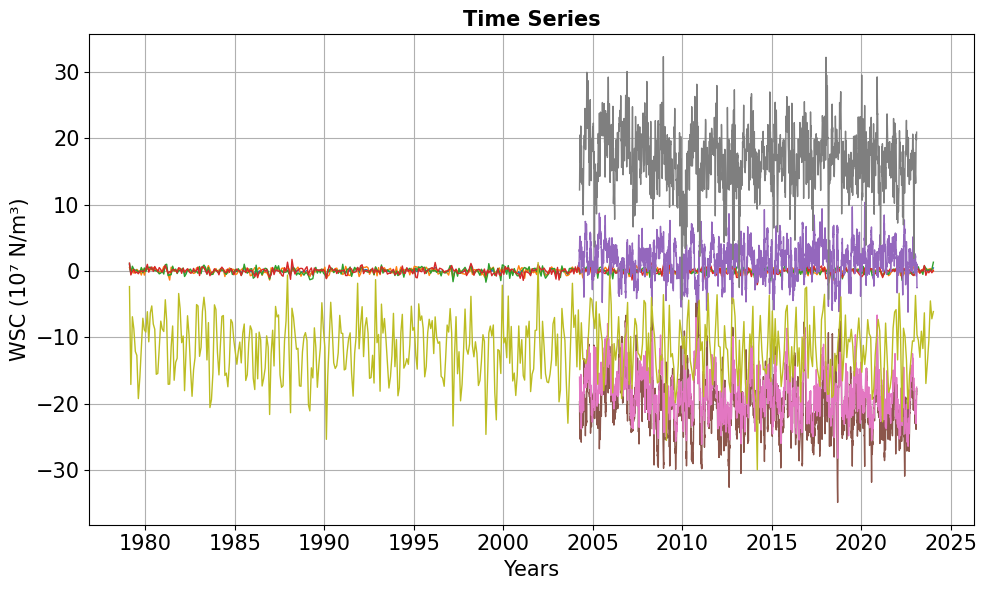

In [7]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(wsc_full_region.time, wsc_series, color='C0', linewidth=1,label='WSC - Full Region')
plt.plot(wsc_full_region.time, wsc_series_west, color='C1', linewidth=1,label='WSC - West')
plt.plot(wsc_full_region.time, wsc_series_central, color='C2', linewidth=1,label='WSC - Central')
plt.plot(wsc_full_region.time, wsc_series_east, color='C3', linewidth=1,label='WSC - East')
plt.plot(ac_dates, ac_series/1e6, color='C4', linewidth=1, label='AC')
plt.plot(gyre_dates, gyre_series, color='C5', linewidth=1, label='Gyre')
plt.plot(umo_series.time, umo_series, color='C6', linewidth=1,label='UMO')
plt.plot(moc_series.time, moc_series, color='C7', linewidth=1,label='MOC')
plt.plot(V_sv_time,V_sv,color='C8',linewidth=1,label='Sverdrup')
#plt.plot(fc_data_15th,fc_monthly_series,color='C8',linewidth=1,label='FC')
plt.xlabel('Years', fontsize=15)
plt.ylabel('WSC (10⁷ N/m³)', fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Time Series', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
                         '2023-02-06 12:00:00',
                         '2023-02-07 00:00:00',
                         '2023-02-07 12:00:00',
                         '2023-02-08 00:00:00',
                         '2023-02-08 12:00:00',
                         '2023-02-09 00:00:00',
                         '2023-02-09 12:00:00',
                         '2023-02-10 00:00:00',
                         '2023-02-10 12:00:00',
                         '2023-02-11 00:00:00'],
              dtype=

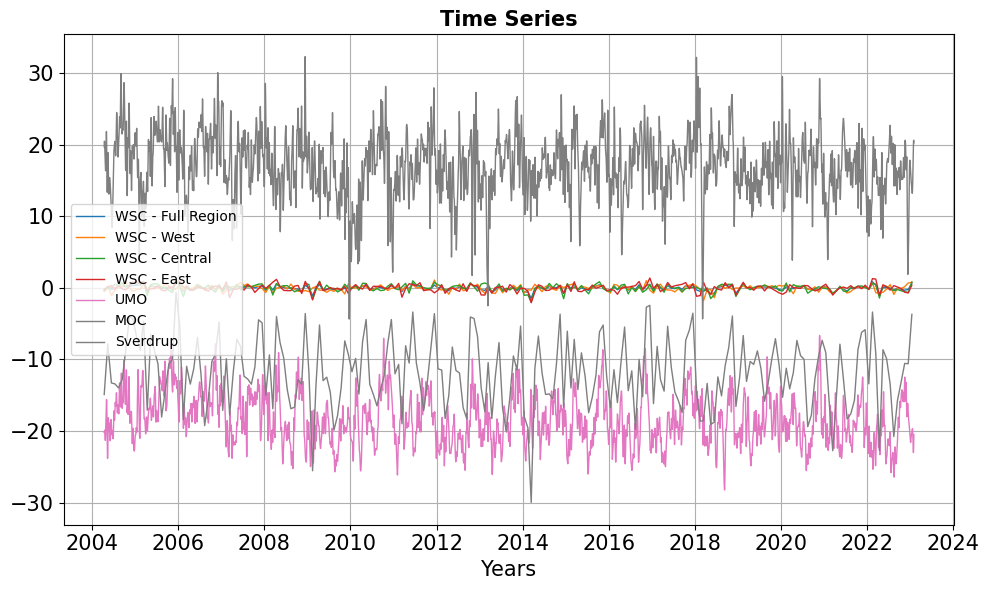

In [8]:
# Convert time data to pandas datetime (if not already in that format)
wsc_full_region_time = pd.to_datetime(wsc_full_region.time)
umo_series_time = pd.to_datetime(umo_series.time)
moc_series_time=pd.to_datetime(moc_series.time)
ac_dates = pd.to_datetime(ac_dates)
gyre_dates = pd.to_datetime(gyre_dates)
print(moc_series_time)

#For MOC and UMO
start_date = pd.to_datetime('2004-04-14 00:00:00')
end_date= pd.to_datetime('2023-01-31 00:00:00')

# Filter wsc_full_region and umo_series
filtered_wsc_mask = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_time = wsc_full_region_time[filtered_wsc_mask]
filtered_wsc_series = wsc_series[filtered_wsc_mask]

filtered_wsc_west_mask = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_west_time = wsc_full_region_time[filtered_wsc_west_mask]
filtered_wsc_west_series = wsc_series_west[filtered_wsc_west_mask]

filtered_wsc_central_mask = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_central_time = wsc_full_region_time[filtered_wsc_central_mask]
filtered_wsc_central_series = wsc_series_central[filtered_wsc_central_mask]

filtered_wsc_east_mask = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_east_time = wsc_full_region_time[filtered_wsc_east_mask]
filtered_wsc_east_series = wsc_series_east[filtered_wsc_east_mask]

filtered_umo_mask = (umo_series_time >= start_date) & (umo_series_time <= end_date)
filtered_umo_time = umo_series_time[filtered_umo_mask]
filtered_umo_series = umo_series[filtered_umo_mask]

filtered_moc_mask = (moc_series_time >= start_date) & (moc_series_time <= end_date)
filtered_moc_time = moc_series_time[filtered_moc_mask]
filtered_moc_series = moc_series[filtered_moc_mask]

filtered_sv_mask = (V_sv_time >= start_date) & (V_sv_time <= end_date)
filtered_sv_time = V_sv_time[filtered_sv_mask]
filtered_sv_series = V_sv[filtered_sv_mask]

filtered_ek_mask = (V_ek_time >= start_date) & (V_ek_time <= end_date)
filtered_ek_time = V_ek_time[filtered_ek_mask]
filtered_ek_series = V_ek[filtered_ek_mask]

filtered_g_mask = (V_g_time >= start_date) & (V_g_time <= end_date)
filtered_g_time = V_g_time[filtered_g_mask]
filtered_g_series = V_g[filtered_g_mask]

# Filter ac_dates and gyre_dates 
filtered_wsc_mask2 = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_time2 = wsc_full_region_time[filtered_wsc_mask2]
filtered_wsc_series2 = wsc_series[filtered_wsc_mask2]

filtered_wsc_west_mask2 = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_west_time2 = wsc_full_region_time[filtered_wsc_west_mask2]
filtered_wsc_west_series2 = wsc_series_west[filtered_wsc_west_mask2]

filtered_wsc_central_mask2 = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_central_time2 = wsc_full_region_time[filtered_wsc_central_mask2]
filtered_wsc_central_series2 = wsc_series_central[filtered_wsc_central_mask2]

filtered_wsc_east_mask2 = (wsc_full_region_time >= start_date) & (wsc_full_region_time <= end_date)
filtered_wsc_east_time2 = wsc_full_region_time[filtered_wsc_east_mask2]
filtered_wsc_east_series2 = wsc_series_east[filtered_wsc_east_mask2]

filtered_ac_dates = ac_dates[(ac_dates >= start_date) & (ac_dates <= end_date)]
filtered_ac_series = ac_series[(ac_dates >= start_date) & (ac_dates <= end_date)]

filtered_gyre_dates = gyre_dates[(gyre_dates >= start_date) & (gyre_dates <= end_date)]
filtered_gyre_series = gyre_series[(gyre_dates >= start_date) & (gyre_dates <= end_date)]

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(filtered_wsc_time, filtered_wsc_series, color='C0', linewidth=1, label='WSC - Full Region')
plt.plot(filtered_wsc_time, filtered_wsc_west_series, color='C1', linewidth=1, label='WSC - West')
plt.plot(filtered_wsc_time, filtered_wsc_central_series, color='C2', linewidth=1, label='WSC - Central')
plt.plot(filtered_wsc_time, filtered_wsc_east_series, color='C3', linewidth=1, label='WSC - East')
#plt.plot(filtered_ac_dates, filtered_ac_series / 1e6, color='C4', linewidth=1, label='AC')
#plt.plot(filtered_gyre_dates, filtered_gyre_series, color='C5', linewidth=1,label='Gyre')
plt.plot(filtered_umo_time, filtered_umo_series, color='C6', linewidth=1, label='UMO')
plt.plot(filtered_moc_time, filtered_moc_series, color='C7', linewidth=1, label='MOC')
plt.plot(filtered_sv_time, filtered_sv_series, color='C7', linewidth=1, label='Sverdrup')
#plt.plot(fc_monthly_series_cropped.time,fc_monthly_series_cropped,color='C8', linewidth=1,label='FC')
plt.xlabel('Years', fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Time Series', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()


In [9]:
# Convert AC Gyre and UMO daily datasets into monthly
ac_data = pd.DataFrame({'Date': filtered_ac_dates, 'AC': filtered_ac_series})
gyre_data = pd.DataFrame({'Date': filtered_gyre_dates, 'Gyre': filtered_gyre_series})
umo_data = pd.DataFrame({'Date': filtered_umo_time, 'UMO': filtered_umo_series})
moc_data = pd.DataFrame({'Date': filtered_moc_time, 'MOC': filtered_moc_series})
sv_data = pd.DataFrame({'Date': filtered_sv_time, 'Sv': filtered_sv_series})
ek_data = pd.DataFrame({'Date': filtered_ek_time, 'Sv': filtered_ek_series})
g_data = pd.DataFrame({'Date': filtered_g_time, 'Sv': filtered_g_series})

# Ensure that the Date column is in datetime format
ac_data['Date'] = pd.to_datetime(ac_data['Date'])
gyre_data['Date'] = pd.to_datetime(gyre_data['Date'])
umo_data['Date'] = pd.to_datetime(umo_data['Date'])
moc_data['Date'] = pd.to_datetime(moc_data['Date'])
sv_data['Date'] = pd.to_datetime(sv_data['Date'])
ek_data['Date'] = pd.to_datetime(ek_data['Date'])
g_data['Date'] = pd.to_datetime(g_data['Date'])

# Set the Date column as the index
ac_data.set_index('Date', inplace=True)
gyre_data.set_index('Date', inplace=True)
umo_data.set_index('Date', inplace=True)
moc_data.set_index('Date', inplace=True)
sv_data.set_index('Date', inplace=True)
g_data.set_index('Date', inplace=True)
ek_data.set_index('Date', inplace=True)

# Resample to monthly frequency and take the mean
monthly_ac_data = ac_data.resample('M').mean()
monthly_gyre_data = gyre_data.resample('M').mean()
monthly_umo_data = umo_data.resample('M').mean()
monthly_moc_data = moc_data.resample('M').mean()

# Shift the index to the 15th of each month
monthly_ac_data.index = monthly_ac_data.index + pd.DateOffset(days=14)
monthly_gyre_data.index = monthly_gyre_data.index + pd.DateOffset(days=14)
monthly_umo_data.index = monthly_umo_data.index + pd.DateOffset(days=14)
monthly_moc_data.index = monthly_moc_data.index + pd.DateOffset(days=14)

In [10]:
# Convert pandas DataFrames to xarray DataArrays, renaming the index to 'time'
ac_xr = xr.DataArray(monthly_ac_data['AC'].values, dims="time", coords={"time": monthly_ac_data.index.rename('time')})
gyre_xr = xr.DataArray(monthly_gyre_data['Gyre'].values, dims="time", coords={"time": monthly_gyre_data.index.rename('time')})
umo_xr = xr.DataArray(monthly_umo_data['UMO'].values, dims="time", coords={"time": monthly_umo_data.index.rename('time')})
moc_xr = xr.DataArray(monthly_moc_data['MOC'].values, dims="time", coords={"time": monthly_moc_data.index.rename('time')})
sv_xr = xr.DataArray(sv_data['Sv'].values, dims='time', coords={"time": sv_data.index.rename('time')})
ek_xr = xr.DataArray(ek_data['Sv'].values, dims='time', coords={"time": ek_data.index.rename('time')})
g_xr = xr.DataArray(g_data['Sv'].values, dims='time', coords={"time": g_data.index.rename('time')})

# Apply 3-month moving average filter (boxcar) for xarray data
wsc_full_3m = filtered_wsc_series.rolling(time=3, center=True).mean()
wsc_west_3m = filtered_wsc_west_series.rolling(time=3, center=True).mean()
wsc_central_3m = filtered_wsc_central_series.rolling(time=3, center=True).mean()
wsc_east_3m = filtered_wsc_east_series.rolling(time=3, center=True).mean()

wsc_full_3m2 = filtered_wsc_series2.rolling(time=3, center=True).mean()
wsc_west_3m2 = filtered_wsc_west_series2.rolling(time=3, center=True).mean()
wsc_central_3m2 = filtered_wsc_central_series2.rolling(time=3, center=True).mean()
wsc_east_3m2 = filtered_wsc_east_series2.rolling(time=3, center=True).mean()

# Apply 3-month moving average filter for the converted xarray DataArrays
ac_3m = ac_xr.rolling(time=3, center=True).mean() / 1e6
gyre_3m = gyre_xr.rolling(time=3, center=True).mean()
umo_3m = umo_xr.rolling(time=3, center=True).mean()
moc_3m = moc_xr.rolling(time=3, center=True).mean()
sv_3m = sv_xr.rolling(time=3, center=True).mean()
ek_3m = ek_xr.rolling(time=3, center=True).mean()
g_3m = g_xr.rolling(time=3, center=True).mean()
#fc_3m = fc_monthly_series_cropped.rolling(time=3, center=True).mean()

# Apply 1-year moving average filter (boxcar) on top of the 3-month filtered data for xarray
wsc_full_1y = wsc_full_3m.rolling(time=12, center=True).mean()
wsc_west_1y = wsc_west_3m.rolling(time=12, center=True).mean()
wsc_central_1y = wsc_central_3m.rolling(time=12, center=True).mean()
wsc_east_1y = wsc_east_3m.rolling(time=12, center=True).mean()

wsc_full_1y2 = wsc_full_3m2.rolling(time=12, center=True).mean()
wsc_west_1y2 = wsc_west_3m2.rolling(time=12, center=True).mean()
wsc_central_1y2 = wsc_central_3m2.rolling(time=12, center=True).mean()
wsc_east_1y2 = wsc_east_3m2.rolling(time=12, center=True).mean()

# Apply 1-year moving average filter for the converted xarray DataArrays
ac_1y = ac_3m.rolling(time=12, center=True).mean()
gyre_1y = gyre_3m.rolling(time=12, center=True).mean()
umo_1y = umo_3m.rolling(time=12, center=True).mean()
moc_1y = moc_3m.rolling(time=12, center=True).mean()
sv_1y = sv_3m.rolling(time=12, center=True).mean()
ek_1y = ek_3m.rolling(time=12, center=True).mean()
g_1y = g_3m.rolling(time=12, center=True).mean()

#fc_1y = fc_3m.rolling(time=12, center=True).mean()

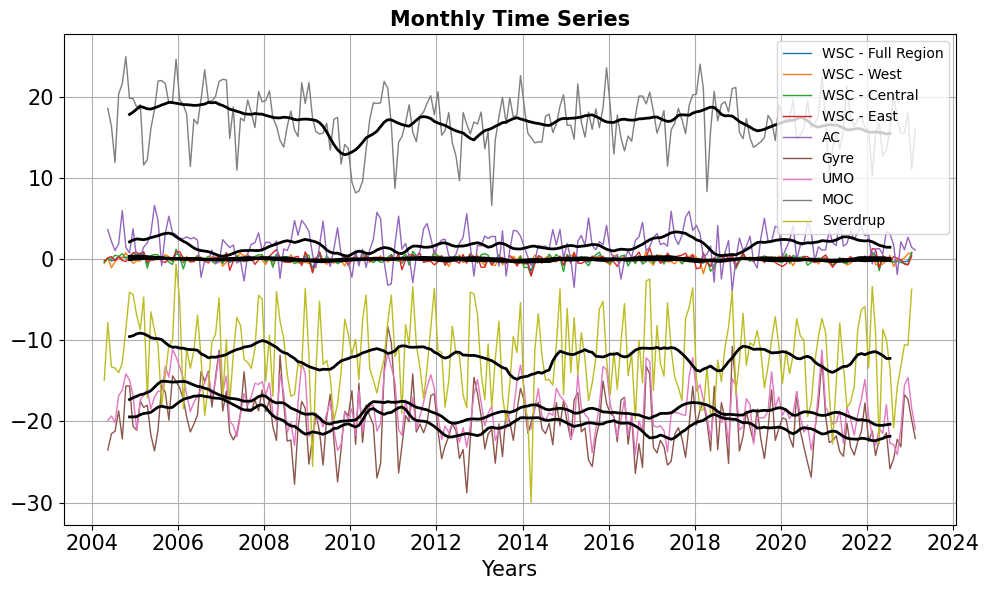

DatetimeIndex(['2004-05-14', '2004-06-14', '2004-07-14', '2004-08-14',
               '2004-09-14', '2004-10-14', '2004-11-14', '2004-12-14',
               '2005-01-14', '2005-02-14',
               ...
               '2022-05-14', '2022-06-14', '2022-07-14', '2022-08-14',
               '2022-09-14', '2022-10-14', '2022-11-14', '2022-12-14',
               '2023-01-14', '2023-02-14'],
              dtype='datetime64[ns]', name='Date', length=226, freq=None)


In [11]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_wsc_time, filtered_wsc_series, color='C0', linewidth=1, label='WSC - Full Region')
plt.plot(filtered_wsc_time, filtered_wsc_west_series, color='C1', linewidth=1, label='WSC - West')
plt.plot(filtered_wsc_time, filtered_wsc_central_series, color='C2', linewidth=1, label='WSC - Central')
plt.plot(filtered_wsc_time, filtered_wsc_east_series, color='C3', linewidth=1, label='WSC - East')
plt.plot(monthly_ac_data.index, monthly_ac_data['AC']/1e6, color='C4', linewidth=1, label='AC')
plt.plot(monthly_gyre_data.index, monthly_gyre_data['Gyre'], color='C5', linewidth=1, label='Gyre')
plt.plot(monthly_umo_data.index, monthly_umo_data['UMO'], color='C6', linewidth=1, label='UMO')
plt.plot(monthly_moc_data.index, monthly_moc_data['MOC'], color='C7', linewidth=1, label='MOC')
plt.plot(sv_data.index, sv_data['Sv'],color='C8', linewidth=1, label='Sverdrup')
plt.plot(filtered_wsc_time2, gyre_1y, color='black', linewidth=2)
plt.plot(filtered_wsc_time, umo_1y, color='black', linewidth=2)
plt.plot(filtered_wsc_time2, ac_1y, color='black', linewidth=2)
plt.plot(filtered_wsc_time, moc_1y, color='black', linewidth=2)
plt.plot(filtered_wsc_time, sv_1y, color='black', linewidth=2)
plt.plot(filtered_wsc_time, wsc_west_1y, color='black',linewidth=2)
plt.plot(filtered_wsc_time, wsc_central_1y, color='black',linewidth=2)
plt.plot(filtered_wsc_time, wsc_east_1y, color='black',linewidth=2)

#plt.plot(fc_monthly_series_cropped.time,fc_monthly_series_cropped,color='C8', linewidth=1,label='FC')
#plt.plot(filtered_wsc_time, fc_1y, color='black', linewidth=2)
plt.xlabel('Years', fontsize=15)
#plt.ylabel('WSC (10⁷ N/m³)', fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('Monthly Time Series', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.legend()
plt.show()
print(monthly_ac_data.index)

In [12]:
fc_trans = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/fc_transports.nc')
# Assuming fc_trans is already defined and contains 'fc_dates' and 'integrated_fc_trans_corrected'
fc_dates = fc_trans['fc_dates']
fc_series = fc_trans['integrated_fc_trans_corrected']
# Convert fc_dates to pandas DatetimeIndex
fc_data = pd.to_datetime(fc_dates)
print(fc_dates)
# Adjust dates to the 15th of each month
def adjust_to_fifteenth(date):
    if date.day < 14:
        return date.replace(day=14)
    else:
        return date + pd.DateOffset(months=1, days=-date.day + 14)
fc_data_15th = fc_data.to_series().apply(adjust_to_fifteenth)
fc_monthly_series = xr.DataArray(data=fc_series, coords=[pd.to_datetime(fc_data_15th)], dims=["time"])
# Apply 3-month moving average filter for the converted xarray DataArrays
fc_3m = fc_monthly_series.rolling(time=3, center=True).mean()
# Apply 1-year moving average filter for the converted xarray DataArrays
fc_1y = fc_3m.rolling(time=12, center=True).mean()
# Get the indices of the first and last valid (non-NaN) entries for the AC time series
first_valid_index = ac_1y.time[~ac_1y.isnull()].min()
last_valid_index = ac_1y.time[~ac_1y.isnull()].max()
# Crop both time series to the time range 2009-2015
fc_monthly_series_cropped = fc_1y.sel(time=slice(first_valid_index, last_valid_index))

<xarray.DataArray 'fc_dates' (fc_dates: 501)>
array(['1982-04-26T00:00:00.000000000', '1982-05-27T00:00:00.000000000',
       '1982-06-26T00:00:00.000000000', ..., '2023-10-27T00:00:00.000000000',
       '2023-11-26T00:00:00.000000000', '2023-12-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * fc_dates  (fc_dates) datetime64[ns] 1982-04-26 1982-05-27 ... 2023-12-27


In [13]:
# Create a new xarray.Dataset with the necessary variables for new plots
ds = xr.Dataset({
    'wsc_time': filtered_wsc_time,
    'wsc_west_1y': wsc_west_1y,
    'wsc_central_1y': wsc_central_1y,
    'wsc_east_1y': wsc_east_1y,
    'wsc_time2':filtered_wsc_time2,
    'umo_1y': umo_1y,
    'time_fc':fc_monthly_series_cropped.time, 
    'fc_1y':fc_monthly_series_cropped,
    'gyre_1y': gyre_1y,
    'ac_1y':ac_1y,
    'moc_1y':moc_1y

})

# Save the dataset to a NetCDF file
#ds.to_netcdf('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/corr_trans.nc')


In [14]:
ds = xr.Dataset({
    'wsc_time': filtered_wsc_time, 
    'wsc_west_1y': wsc_west_1y.astype('float32'),
    'wsc_central_1y': wsc_central_1y.astype('float32'),
    'wsc_east_1y': wsc_east_1y.astype('float32'),
    'wsc_time2': filtered_wsc_time2, 
    'umo_1y': umo_1y.astype('float32'),
    'time_fc': fc_monthly_series_cropped.time,
    'fc_1y': fc_monthly_series_cropped.astype('float32'),
    'gyre_1y': gyre_1y.astype('float32'),
    'ac_1y': ac_1y.astype('float32'),
    'moc_1y': moc_1y.astype('float32')
})

# Save the dataset to a NetCDF file
#ds.to_netcdf('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/corr_trans.nc')


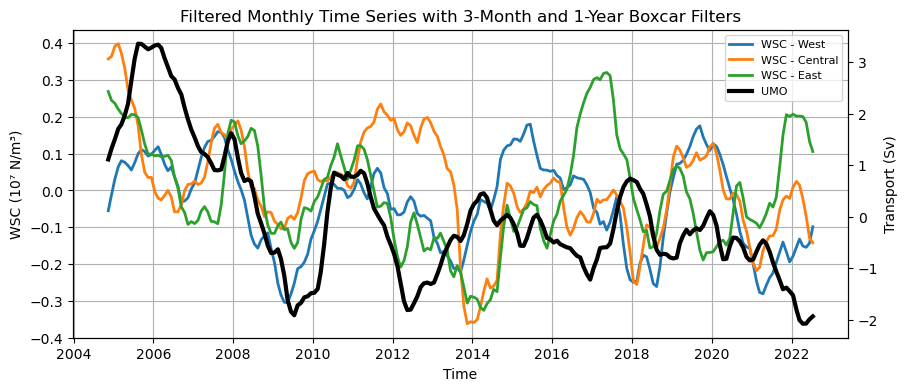

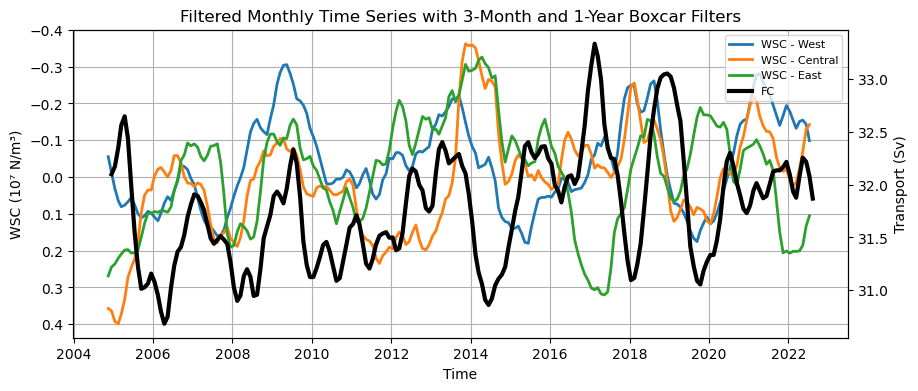

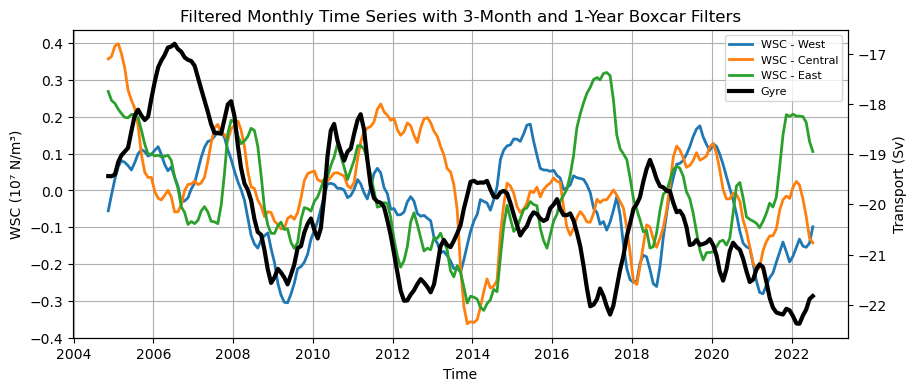

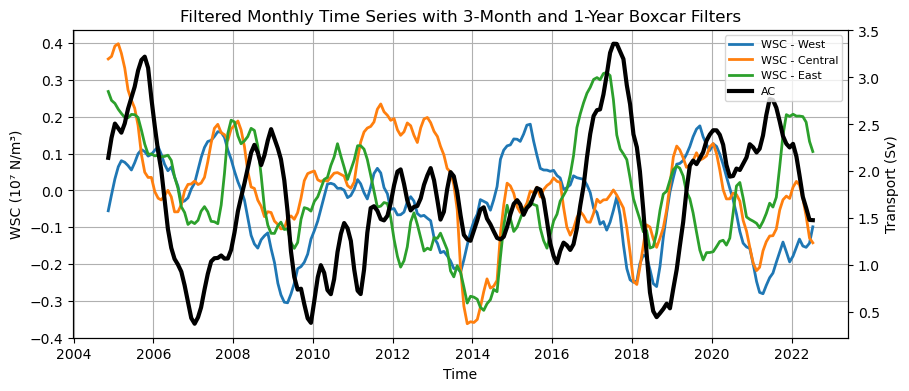

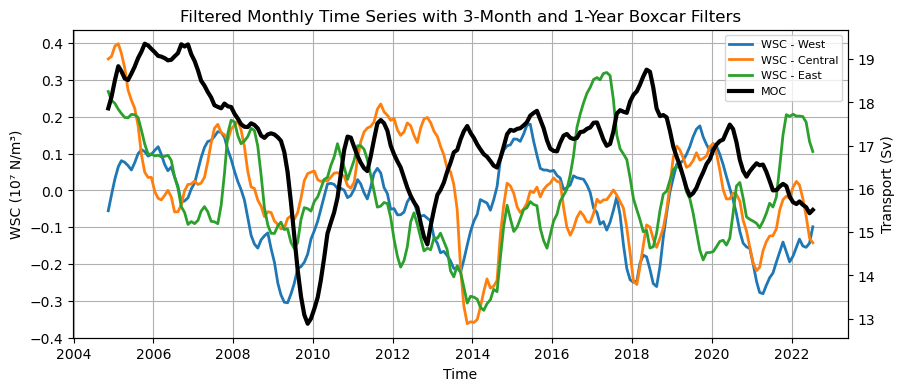

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 4))
#print(gyre_1y)
#print(wsc_west_1y)
#print(umo_1y)
# Plot WSC data on the primary y-axis (left side)
#ax1.plot(filtered_wsc_time, wsc_full_1y, color='C0', linewidth=2, label='WSC - Full Region')
ax1.plot(filtered_wsc_time, wsc_west_1y, color='C0', linewidth=2, label='WSC - West')
ax1.plot(filtered_wsc_time, wsc_central_1y, color='C1', linewidth=2, label='WSC - Central')
ax1.plot(filtered_wsc_time, wsc_east_1y, color='C2', linewidth=2, label='WSC - East')
ax1.set_xlabel('Time')
ax1.set_ylabel('WSC (10⁷ N/m³)')
#ax1.set_ylim(-1, 1)
#ax1.invert_yaxis()
# Secondary y-axis for the Gyre data (right side)
ax2 = ax1.twinx()
ax1.grid(True)
#ax2.plot(filtered_wsc_time2, gyre_1y, color='C0', linewidth=2, label='Gyre')
ax2.plot(filtered_wsc_time2, umo_1y-np.mean(umo_1y) , color='black', linewidth=3, label='UMO')
#ax2.plot(filtered_wsc_time2, ac_1y, color='C5', linewidth=2, label='AC')
#ax2.plot(filtered_wsc_time, moc_1y, color='C6', linewidth=2, label='MOC')

ax2.set_ylabel('Transport (Sv)')
#ax2.set_ylim(-30, -10)
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time, wsc_west_1y, color='C0', linewidth=2, label='WSC - West')
ax1.plot(filtered_wsc_time, wsc_central_1y, color='C1', linewidth=2, label='WSC - Central')
ax1.plot(filtered_wsc_time, wsc_east_1y, color='C2', linewidth=2, label='WSC - East')
ax1.set_xlabel('Time')
ax1.set_ylabel('WSC (10⁷ N/m³)')
ax1.invert_yaxis()
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(fc_monthly_series_cropped.time, fc_monthly_series_cropped, color='black', linewidth=3, label='FC')
ax2.set_ylabel('Transport (Sv)')
#ax2.set_ylim(-30, -10)
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()


fig, ax1 = plt.subplots(figsize=(10, 4))
#print(gyre_1y)
#print(wsc_west_1y)
#print(umo_1y)
# Plot WSC data on the primary y-axis (left side)
#ax1.plot(filtered_wsc_time, wsc_full_1y, color='C0', linewidth=2, label='WSC - Full Region')
ax1.plot(filtered_wsc_time, wsc_west_1y, color='C0', linewidth=2, label='WSC - West')
ax1.plot(filtered_wsc_time, wsc_central_1y, color='C1', linewidth=2, label='WSC - Central')
ax1.plot(filtered_wsc_time, wsc_east_1y, color='C2', linewidth=2, label='WSC - East')
ax1.set_xlabel('Time')
ax1.set_ylabel('WSC (10⁷ N/m³)')
#ax1.set_ylim(-1, 1)
#ax1.invert_yaxis()
# Secondary y-axis for the Gyre data (right side)
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(filtered_wsc_time2, gyre_1y, color='black', linewidth=3, label='Gyre')
#ax2.plot(filtered_wsc_time, umo_1y, color='C4', linewidth=2, label='UMO')
#ax2.plot(filtered_wsc_time2, ac_1y, color='C5', linewidth=2, label='AC')
#ax2.plot(filtered_wsc_time, moc_1y, color='C6', linewidth=2, label='MOC')
ax2.set_ylabel('Transport (Sv)')
#ax2.set_ylim(-30, -10)
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
#print(gyre_1y)
#print(wsc_west_1y)
#print(umo_1y)
# Plot WSC data on the primary y-axis (left side)
#ax1.plot(filtered_wsc_time, wsc_full_1y, color='C0', linewidth=2, label='WSC - Full Region')
ax1.plot(filtered_wsc_time, wsc_west_1y, color='C0', linewidth=2, label='WSC - West')
ax1.plot(filtered_wsc_time, wsc_central_1y, color='C1', linewidth=2, label='WSC - Central')
ax1.plot(filtered_wsc_time, wsc_east_1y, color='C2', linewidth=2, label='WSC - East')
ax1.set_xlabel('Time')
ax1.set_ylabel('WSC (10⁷ N/m³)')
#ax1.set_ylim(-1, 1)
#ax1.invert_yaxis()
# Secondary y-axis for the Gyre data (right side)
ax2 = ax1.twinx()
ax1.grid(True)
#ax2.plot(filtered_wsc_time2, gyre_1y, color='C0', linewidth=2, label='Gyre')
#ax2.plot(filtered_wsc_time, umo_1y, color='C4', linewidth=2, label='UMO')
ax2.plot(filtered_wsc_time2, ac_1y, color='black', linewidth=3, label='AC')
#ax2.plot(filtered_wsc_time, moc_1y, color='C6', linewidth=2, label='MOC')

ax2.set_ylabel('Transport (Sv)')
#ax2.set_ylim(-30, -10)
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
#print(gyre_1y)
#print(wsc_west_1y)
#print(umo_1y)
# Plot WSC data on the primary y-axis (left side)
#ax1.plot(filtered_wsc_time, wsc_full_1y, color='C0', linewidth=2, label='WSC - Full Region')
ax1.plot(filtered_wsc_time, wsc_west_1y, color='C0', linewidth=2, label='WSC - West')
ax1.plot(filtered_wsc_time, wsc_central_1y, color='C1', linewidth=2, label='WSC - Central')
ax1.plot(filtered_wsc_time, wsc_east_1y, color='C2', linewidth=2, label='WSC - East')
ax1.set_xlabel('Time')
ax1.set_ylabel('WSC (10⁷ N/m³)')
#ax1.set_ylim(-1, 1)
#ax1.invert_yaxis()
# Secondary y-axis for the Gyre data (right side)
ax2 = ax1.twinx()
ax1.grid(True)
#ax2.plot(filtered_wsc_time2, gyre_1y, color='C0', linewidth=2, label='Gyre')
#ax2.plot(filtered_wsc_time, umo_1y, color='C4', linewidth=2, label='UMO')
#ax2.plot(filtered_wsc_time2, ac_1y, color='C5', linewidth=2, label='AC')
ax2.plot(filtered_wsc_time2, moc_1y, color='black', linewidth=3, label='MOC')

ax2.set_ylabel('Transport (Sv)')
#ax2.set_ylim(-30, -10)
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()



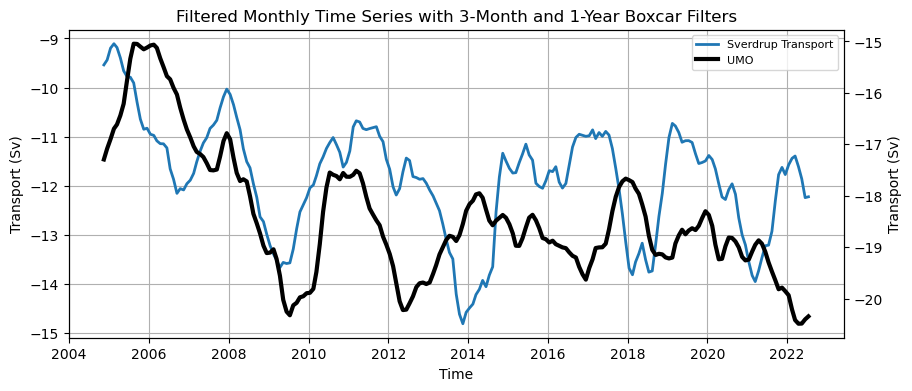

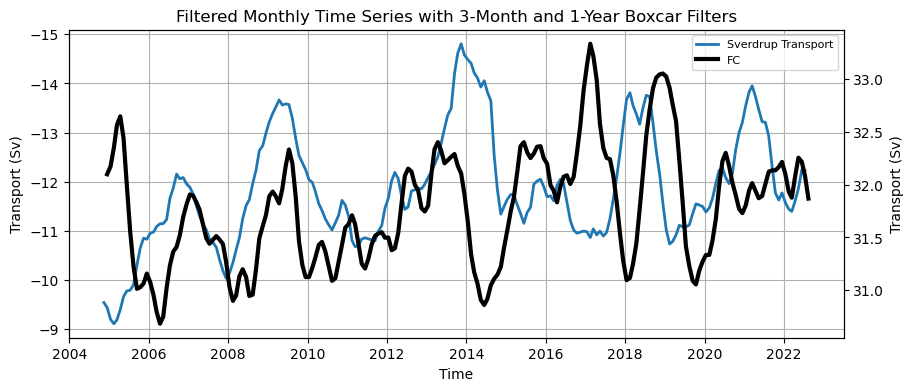

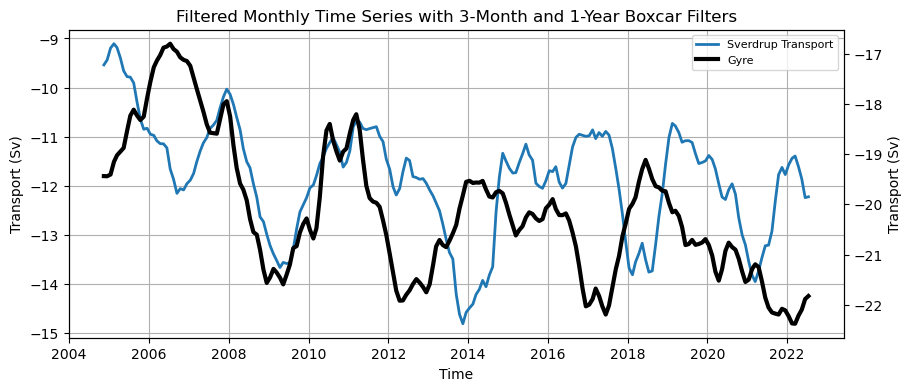

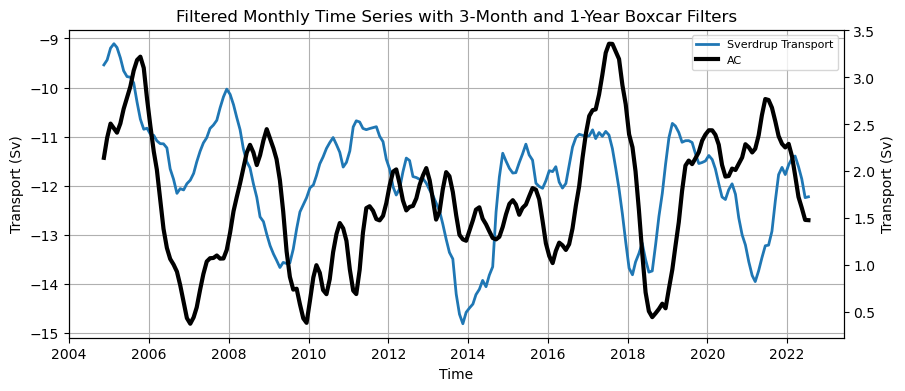

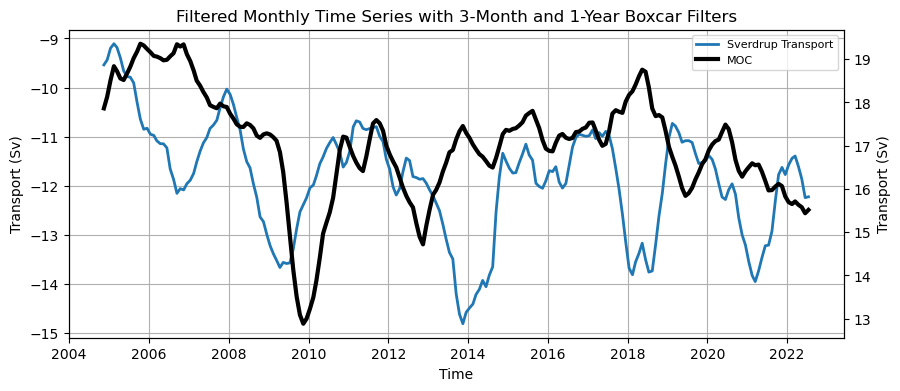

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time2, sv_1y, color='C0', linewidth=2, label='Sverdrup Transport')
ax1.set_xlabel('Time')
ax1.set_ylabel('Transport (Sv)')
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(filtered_wsc_time2, umo_1y , color='black', linewidth=3, label='UMO')
ax2.set_ylabel('Transport (Sv)')
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time2, sv_1y, color='C0', linewidth=2, label='Sverdrup Transport')
ax1.set_xlabel('Time')
ax1.set_ylabel('Transport (Sv)')
ax1.invert_yaxis()
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(fc_monthly_series_cropped.time, fc_monthly_series_cropped, color='black', linewidth=3, label='FC')
ax2.set_ylabel('Transport (Sv)')
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time2, sv_1y, color='C0', linewidth=2, label='Sverdrup Transport')
ax1.set_xlabel('Time')
ax1.set_ylabel('Transport (Sv)')
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(filtered_wsc_time2, gyre_1y, color='black', linewidth=3, label='Gyre')
ax2.set_ylabel('Transport (Sv)')
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time2, sv_1y, color='C0', linewidth=2, label='Sverdrup Transport')
ax1.set_xlabel('Time')
ax1.set_ylabel('Transport (Sv)')
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(filtered_wsc_time2, ac_1y, color='black', linewidth=3, label='AC')
ax2.set_ylabel('Transport (Sv)')
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(filtered_wsc_time2, sv_1y, color='C0', linewidth=2, label='Sverdrup Transport')
ax1.set_xlabel('Time')
ax1.set_ylabel('Transport (Sv)')
ax2 = ax1.twinx()
ax1.grid(True)
ax2.plot(filtered_wsc_time2, moc_1y, color='black', linewidth=3, label='MOC')
ax2.set_ylabel('Transport (Sv)')
plt.title('Filtered Monthly Time Series with 3-Month and 1-Year Boxcar Filters')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right',fontsize=8)
plt.show()

In [46]:
# Lag correlation function using xarray
def lag_correlation(data1, data2, max_lag):
    correlations = []
    len_ser=[]
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            # Shift data2 forward for negative lag
            shifted_data2 = data2.shift(time=-lag)
            corr = xr.corr(data1, shifted_data2, dim='time')
        else:
            # Shift data1 forward for positive lag
            shifted_data1 = data1.shift(time=lag)
            corr = xr.corr(shifted_data1, data2, dim='time')
        correlations.append(corr.values)  # Extract the correlation value
        len_ser.append(len(data1)-abs(lag))
    return correlations,len_ser

max_lag = 48 #48 #number of months to do the lag correlation
lags = range(-max_lag, max_lag+1)

# Compute lag correlations for WSC and Gyre data in each region
correlations_west_gyre,len_ser_gyre = lag_correlation(wsc_west_1y2,gyre_1y, max_lag)
correlations_central_gyre, len_ser_gyre= lag_correlation(wsc_central_1y2,gyre_1y, max_lag)
correlations_east_gyre,len_ser_gyre = lag_correlation(wsc_east_1y2,gyre_1y, max_lag)

# Compute lag correlations for WSC and FC data in each region
correlations_west_fc,len_ser_fc = lag_correlation(wsc_west_1y2,fc_monthly_series_cropped, max_lag)
correlations_central_fc, len_ser_fc= lag_correlation(wsc_central_1y2,fc_monthly_series_cropped, max_lag)
correlations_east_fc,len_ser_fc = lag_correlation(wsc_east_1y2,fc_monthly_series_cropped, max_lag)

#Correlation with umo
correlations_west_umo,len_ser_umo = lag_correlation(wsc_west_1y, umo_1y,max_lag)
correlations_central_umo,len_ser_umo = lag_correlation(wsc_central_1y,umo_1y,  max_lag)
correlations_east_umo, len_ser_umo = lag_correlation(wsc_east_1y,umo_1y,  max_lag)

#Correlation with ac
correlations_west_ac, len_ser_ac = lag_correlation(wsc_west_1y2,ac_1y, max_lag)
correlations_central_ac, len_ser_ac = lag_correlation(wsc_central_1y2,ac_1y, max_lag)
correlations_east_ac, len_ser_ac = lag_correlation(wsc_east_1y2,ac_1y,  max_lag)

#Correlation with moc
correlations_west_moc, len_ser_moc = lag_correlation(wsc_west_1y,moc_1y, max_lag)
correlations_central_moc, len_ser_moc = lag_correlation(wsc_central_1y,moc_1y, max_lag)
correlations_east_moc,len_ser_moc = lag_correlation(wsc_east_1y,moc_1y, max_lag)

correlations_sv_gyre, len_ser_sv_gyre = lag_correlation(sv_1y,gyre_1y, max_lag)
correlations_sv_fc, len_ser_sv_fc = lag_correlation(sv_1y,fc_1y, max_lag)
correlations_sv_umo, len_ser_sv_umo = lag_correlation(sv_1y,umo_1y, max_lag)
correlations_sv_ac, len_ser_sv_ac = lag_correlation(sv_1y,ac_1y, max_lag)
correlations_sv_moc, len_ser_sv_moc = lag_correlation(sv_1y,moc_1y, max_lag)

correlations_ek_gyre, len_ser_ek_gyre = lag_correlation(ek_1y,gyre_1y, max_lag)
correlations_ek_fc, len_ser_ek_fc = lag_correlation(ek_1y,fc_1y, max_lag)
correlations_ek_umo, len_ser_ek_umo = lag_correlation(ek_1y,umo_1y, max_lag)
correlations_ek_ac, len_ser_ek_ac = lag_correlation(ek_1y,ac_1y, max_lag)
correlations_ek_moc, len_ser_ek_moc = lag_correlation(ek_1y,moc_1y, max_lag)

correlations_g_gyre, len_ser_g_gyre = lag_correlation(g_1y,gyre_1y, max_lag)
correlations_g_fc, len_ser_g_fc = lag_correlation(g_1y,fc_1y, max_lag)
correlations_g_umo, len_ser_g_umo = lag_correlation(g_1y,umo_1y, max_lag)
correlations_g_ac, len_ser_g_ac = lag_correlation(g_1y,ac_1y, max_lag)
correlations_g_moc, len_ser_g_moc = lag_correlation(g_1y,moc_1y, max_lag)

#print(wsc_west_1y2)

In [47]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Function to compute confidence intervals for correlations
def compute_confidence_intervals(data1, correlations, len_ser):
    data1 = data1.dropna(dim='time')  # eliminating Nan Values
    autocorr = sm.tsa.acf(data1, nlags=len(data1) - 1)#zero crossing
    T_int = 1 + 2 * np.sum(autocorr) #integrating from 0 to infinity
    N_eff = len_ser / T_int # effective n
    N_eff_max=len(data1)-14/T_int
    # Sample data
    r = np.array(correlations)
    #r = correlations  # Use correlations for the current calculation
    #r=max(correlations)
    # Calculate the t-statistic
    t_statistic = r * np.sqrt(N_eff - 2) / np.sqrt(1 - r**2)

    # Calculate the p-value (two-tailed)
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=N_eff - 2))

    # Fisher's Z transformation
    z = 0.5 * np.log((1 + r) / (1 - r))
    se = 1 / np.sqrt(N_eff - 3)  # Standard error

    # Calculate the confidence interval
    z_critical = stats.norm.ppf(1 - 0.05 / 2)  # For 95% CI is 1.96
    lower_bound = z - z_critical * se
    upper_bound = z + z_critical * se

    # Transform back from Z to r
    lower_bound_r = (np.exp(2 * lower_bound) - 1) / (np.exp(2 * lower_bound) + 1)
    upper_bound_r = (np.exp(2 * upper_bound) - 1) / (np.exp(2 * upper_bound) + 1)
    print(f'T-statistic: {t_statistic}, p-value: {p_value}')
    print(f'95% Confidence interval for the correlation: ({lower_bound_r}, {upper_bound_r})')

    return lower_bound_r, upper_bound_r

# Compute confidence intervals for 'ac' 
lower_bound_ac_west, upper_bound_ac_west = compute_confidence_intervals(ac_1y, correlations_west_ac, len_ser_ac)
lower_bound_ac_central, upper_bound_ac_central = compute_confidence_intervals(ac_1y, correlations_central_ac, len_ser_ac)
lower_bound_ac_east, upper_bound_ac_east = compute_confidence_intervals(ac_1y, correlations_east_ac, len_ser_ac)

# Compute confidence intervals for 'fc' 
lower_bound_fc_west, upper_bound_fc_west = compute_confidence_intervals(fc_monthly_series_cropped, correlations_west_fc, len_ser_fc)
lower_bound_fc_central, upper_bound_fc_central = compute_confidence_intervals(fc_monthly_series_cropped, correlations_central_fc, len_ser_fc)
lower_bound_fc_east, upper_bound_fc_east = compute_confidence_intervals(fc_monthly_series_cropped, correlations_east_fc, len_ser_fc)

#print(len_ser_ac)
# Compute confidence intervals for gyre 
lower_bound_gyre_west, upper_bound_gyre_west = compute_confidence_intervals(gyre_1y-np.mean(gyre_1y), correlations_west_gyre, len_ser_gyre)
lower_bound_gyre_central, upper_bound_gyre_central = compute_confidence_intervals(gyre_1y-np.mean(gyre_1y), correlations_central_gyre, len_ser_gyre)
lower_bound_gyre_east, upper_bound_gyre_east = compute_confidence_intervals(gyre_1y-np.mean(gyre_1y), correlations_east_gyre, len_ser_gyre)

# Compute confidence intervals for umo
lower_bound_umo_west, upper_bound_umo_west = compute_confidence_intervals(umo_1y, correlations_west_umo, len_ser_umo)
lower_bound_umo_central, upper_bound_umo_central = compute_confidence_intervals(umo_1y, correlations_central_umo, len_ser_umo)
lower_bound_umo_east, upper_bound_umo_east = compute_confidence_intervals(umo_1y, correlations_east_umo, len_ser_umo)

# Compute confidence intervals for moc 
lower_bound_moc_west, upper_bound_moc_west = compute_confidence_intervals(moc_1y, correlations_west_moc, len_ser_moc)
lower_bound_moc_central, upper_bound_moc_central = compute_confidence_intervals(moc_1y, correlations_central_moc, len_ser_moc)
lower_bound_moc_east, upper_bound_moc_east = compute_confidence_intervals(moc_1y, correlations_east_moc, len_ser_moc)

#Confidence intervals for Sv and different transports 
lower_bound_gyre_sv, upper_bound_gyre_sv = compute_confidence_intervals(gyre_1y, correlations_sv_gyre,len_ser_sv_gyre)
lower_bound_fc_sv, upper_bound_fc_sv = compute_confidence_intervals(fc_1y, correlations_sv_fc,len_ser_sv_fc)
lower_bound_umo_sv, upper_bound_umo_sv = compute_confidence_intervals(umo_1y, correlations_sv_umo,len_ser_sv_umo)
lower_bound_ac_sv, upper_bound_ac_sv = compute_confidence_intervals(ac_1y, correlations_sv_ac,len_ser_sv_ac)
lower_bound_moc_sv, upper_bound_moc_sv = compute_confidence_intervals(moc_1y, correlations_sv_moc,len_ser_sv_moc)

#Confidence intervals for ek contribution to Sv and different transports 
#lower_bound_gyre_ek, upper_bound_gyre_ek = compute_confidence_intervals(gyre_1y, correlations_ek_gyre,len_ser_ek_gyre)
#lower_bound_fc_ek, upper_bound_fc_ek = compute_confidence_intervals(fc_1y, correlations_ek_fc,len_ser_ek_fc)
#lower_bound_umo_ek, upper_bound_umo_ek = compute_confidence_intervals(umo_1y, correlations_ek_umo,len_ser_ek_umo)
#lower_bound_ac_ek, upper_bound_ac_ek = compute_confidence_intervals(ac_1y, correlations_ek_ac,len_ser_ek_ac)
#lower_bound_moc_ek, upper_bound_moc_ek = compute_confidence_intervals(moc_1y, correlations_ek_moc,len_ser_ek_moc)

#Confidence intervals for geostrophic contribution to Sv and different transports 
#lower_bound_gyre_g, upper_bound_gyre_g = compute_confidence_intervals(gyre_1y, correlations_g_gyre,len_ser_g_gyre)
#lower_bound_fc_g, upper_bound_fc_g = compute_confidence_intervals(fc_1y, correlations_g_fc,len_ser_g_fc)
#lower_bound_umo_g, upper_bound_umo_g = compute_confidence_intervals(umo_1y, correlations_g_umo,len_ser_g_umo)
#lower_bound_ac_g, upper_bound_ac_g = compute_confidence_intervals(ac_1y, correlations_g_ac,len_ser_g_ac)
#lower_bound_moc_g, upper_bound_moc_g = compute_confidence_intervals(moc_1y, correlations_g_moc,len_ser_g_moc)


T-statistic: [-4.76954186 -4.56891961 -4.42904517 -4.31794086 -4.14371859 -3.8179433
 -3.29642671 -2.63139362 -1.88550529 -1.14076485 -0.43058174  0.2337676
  0.88716853  1.58057706  2.38603453  3.32809745  4.36782137  5.40173384
  6.28920087  6.94974803  7.37334651  7.60125685  7.61573435  7.4036709
  6.93422916  6.21473559  5.27958173  4.20856293  3.122833    2.09501939
  1.15807399  0.26027437 -0.65168794 -1.61088984 -2.58964325 -3.54102998
 -4.40095709 -5.11368586 -5.61913397 -5.89795737 -5.97026165 -5.87004319
 -5.61050696 -5.17542111 -4.56493503 -3.82762395 -3.04412601 -2.28471663
 -1.56157986 -0.86520812 -0.20359953  0.41719136  0.97966647  1.46033264
  1.83204562  2.0896977   2.22345713  2.27103134  2.2873822   2.35219849
  2.46272871  2.58406552  2.66404353  2.66091877  2.58077361  2.45069195
  2.31729335  2.19405925  2.10366613  2.04477256  2.00097939  1.90657115
  1.72782718  1.47692336  1.20522786  0.97991269  0.83455881  0.760201
  0.69678337  0.58668814  0.3842551   0.062

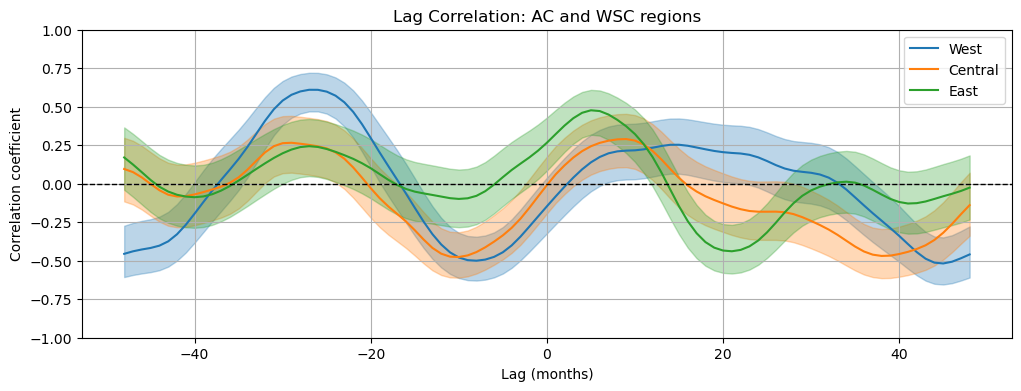

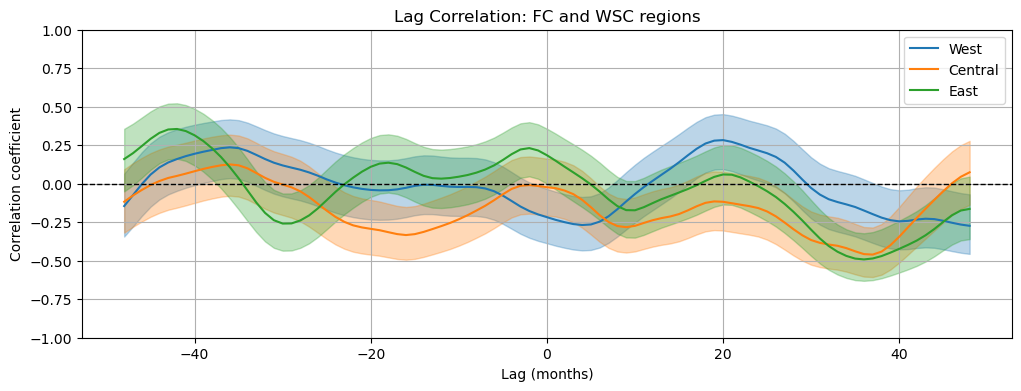

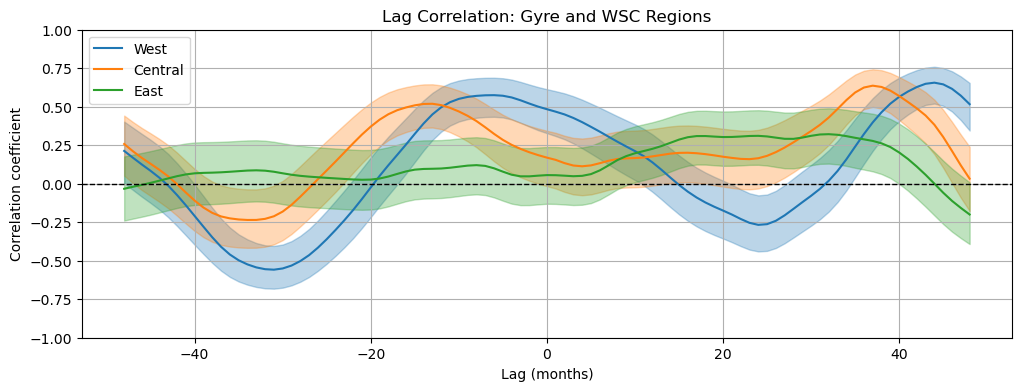

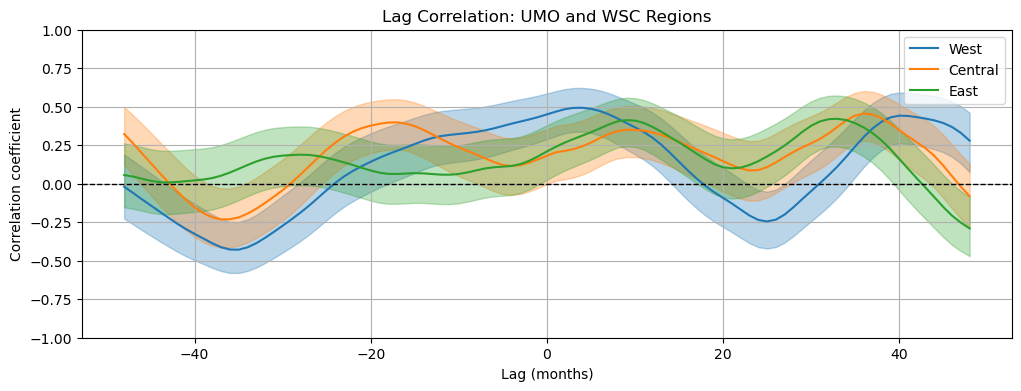

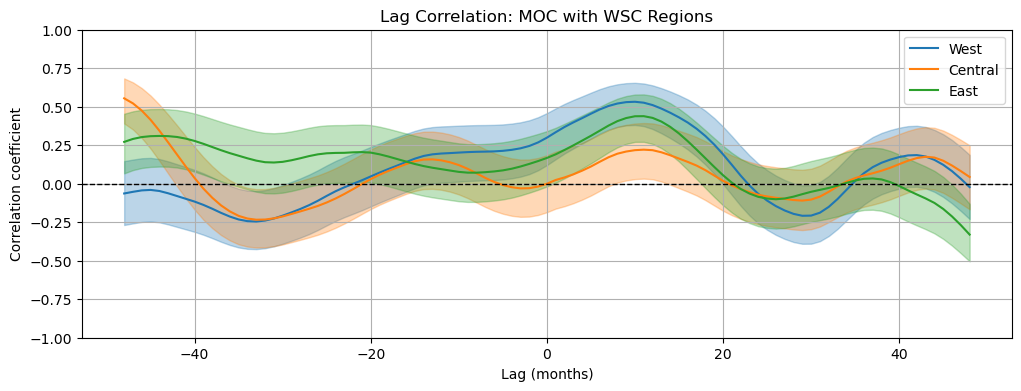

In [48]:
# Function to plot three correlations with filled confidence intervals
def plot_three_correlations(lags, correlations, lower_bounds, upper_bounds, title):
    plt.figure(figsize=(12, 4))
    
    colors = ['C0', 'C1', 'C2']  # Colors for the three regions
    regions=['West','Central','East']
    # Plot each correlation with its bounds
    for i in range(3):
        plt.plot(lags, correlations[i], label=regions[i], color=colors[i])
        plt.fill_between(lags, lower_bounds[i], upper_bounds[i], alpha=0.3, color=colors[i])  # Confidence intervals

    plt.axhline(0, color='black', lw=1, ls='--')
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation coefficient')
    plt.ylim(-1,1)
    #plt.gca().invert_yaxis()
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# AC correlations
plot_three_correlations(lags,[correlations_west_ac, correlations_central_ac, correlations_east_ac],
    [lower_bound_ac_west, lower_bound_ac_central, lower_bound_ac_east],
    [upper_bound_ac_west, upper_bound_ac_central, upper_bound_ac_east],
    title='Lag Correlation: AC and WSC regions')

# FC correlations
plot_three_correlations(lags,[correlations_west_fc, correlations_central_fc, correlations_east_fc],
    [lower_bound_fc_west, lower_bound_fc_central, lower_bound_fc_east],
    [upper_bound_fc_west, upper_bound_fc_central, upper_bound_fc_east],
    title='Lag Correlation: FC and WSC regions')


# Repeat for GYRE, UMO, and MOC
# For GYRE correlations
plot_three_correlations(lags,[correlations_west_gyre, correlations_central_gyre, correlations_east_gyre],
    [lower_bound_gyre_west, lower_bound_gyre_central, lower_bound_gyre_east],
    [upper_bound_gyre_west, upper_bound_gyre_central, upper_bound_gyre_east],
    title='Lag Correlation: Gyre and WSC Regions')

# For UMO correlations
plot_three_correlations(lags,[correlations_west_umo, correlations_central_umo, correlations_east_umo],
    [lower_bound_umo_west, lower_bound_umo_central, lower_bound_umo_east],
    [upper_bound_umo_west, upper_bound_umo_central, upper_bound_umo_east],
    title='Lag Correlation: UMO and WSC Regions')

# For MOC correlations
plot_three_correlations(lags,[correlations_west_moc, correlations_central_moc, correlations_east_moc],
    [lower_bound_moc_west, lower_bound_moc_central, lower_bound_moc_east],
    [upper_bound_moc_west, upper_bound_moc_central, upper_bound_moc_east],
    title='Lag Correlation: MOC with WSC Regions')


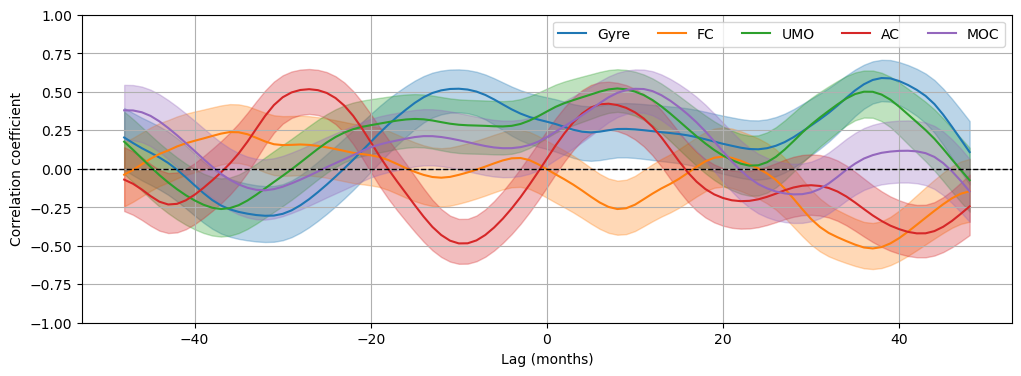

In [49]:
# Function to plot three correlations with filled confidence intervals
def plot_five_correlations(lags, correlations, lower_bounds, upper_bounds):
    plt.figure(figsize=(12, 4))
    colors = ['C0', 'C1', 'C2','C3','C4']  # Colors for the three regions
    transports=['Gyre','FC','UMO','AC','MOC']
    # Plot each correlation with its bounds
    for i in range(5):
        plt.plot(lags, correlations[i], label=transports[i], color=colors[i])
        plt.fill_between(lags, lower_bounds[i], upper_bounds[i], alpha=0.3, color=colors[i])  # Confidence intervals

    plt.axhline(0, color='black', lw=1, ls='--')
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation coefficient')
    plt.ylim(-1,1)
    #plt.gca().invert_yaxis()
    #plt.title('Lag Correlation with Sverdrup Transport')
    plt.legend(ncol=5)
    plt.grid()
    plt.show()

plot_five_correlations(lags, 
    [correlations_sv_gyre, correlations_sv_fc, correlations_sv_umo, correlations_sv_ac, correlations_sv_moc],
    [lower_bound_gyre_sv, lower_bound_fc_sv, lower_bound_umo_sv,lower_bound_ac_sv, lower_bound_moc_sv],
    [upper_bound_gyre_sv, upper_bound_fc_sv, upper_bound_umo_sv,upper_bound_ac_sv, upper_bound_moc_sv])

#plot_five_correlations(lags, 
    #[correlations_ek_gyre, correlations_ek_fc, correlations_ek_umo, correlations_ek_ac, correlations_ek_moc],
    #[lower_bound_gyre_ek, lower_bound_fc_ek, lower_bound_umo_ek,lower_bound_ac_ek, lower_bound_moc_ek],
    #[upper_bound_gyre_ek, upper_bound_fc_ek, upper_bound_umo_ek,upper_bound_ac_ek, upper_bound_moc_ek])

#plot_five_correlations(lags, 
    #[correlations_g_gyre, correlations_g_fc, correlations_g_umo, correlations_g_ac, correlations_g_moc],
    #[lower_bound_gyre_g, lower_bound_fc_g, lower_bound_umo_g,lower_bound_ac_g, lower_bound_moc_g],
    #[upper_bound_gyre_g, upper_bound_fc_g, upper_bound_umo_g,upper_bound_ac_g, upper_bound_moc_g])


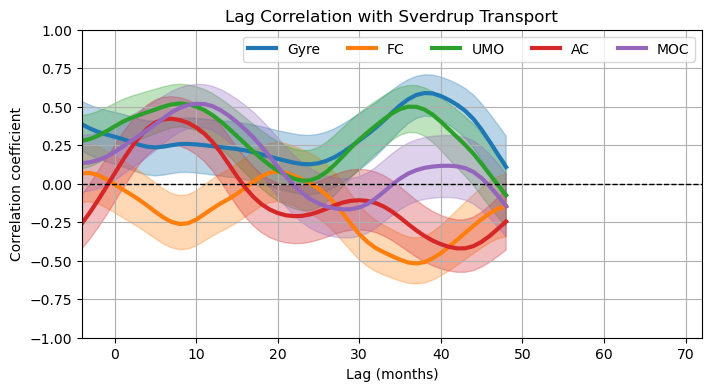

In [50]:
# Function to plot five correlations with filled confidence intervals
def plot_five_correlations_cut_axis(lags, correlations, lower_bounds, upper_bounds):
    plt.figure(figsize=(8, 4))
    colors = ['C0', 'C1', 'C2', 'C3', 'C4']
    transports = ['Gyre', 'FC', 'UMO', 'AC', 'MOC']

    for i in range(5):
        plt.plot(lags, correlations[i], label=transports[i], color=colors[i],linewidth=3)
        plt.fill_between(lags, lower_bounds[i], upper_bounds[i], alpha=0.3, color=colors[i])  # Confidence intervals

    plt.axhline(0, color='black', lw=1, ls='--')  # Horizontal line at y=0
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation coefficient')
    plt.ylim(-1, 1)
    # Set the x-axis to only show positive values
    #plt.xlim([0 48]) # Set the x-axis to only show positive values
    plt.xlim([-4, 12*6])
    plt.title('Lag Correlation with Sverdrup Transport')
    plt.legend(ncol=5)
    plt.grid()
    plt.show()

plot_five_correlations_cut_axis(lags, 
    [correlations_sv_gyre, correlations_sv_fc, correlations_sv_umo, correlations_sv_ac, correlations_sv_moc],
    [lower_bound_gyre_sv, lower_bound_fc_sv, lower_bound_umo_sv, lower_bound_ac_sv, lower_bound_moc_sv],
    [upper_bound_gyre_sv, upper_bound_fc_sv, upper_bound_umo_sv, upper_bound_ac_sv, upper_bound_moc_sv])


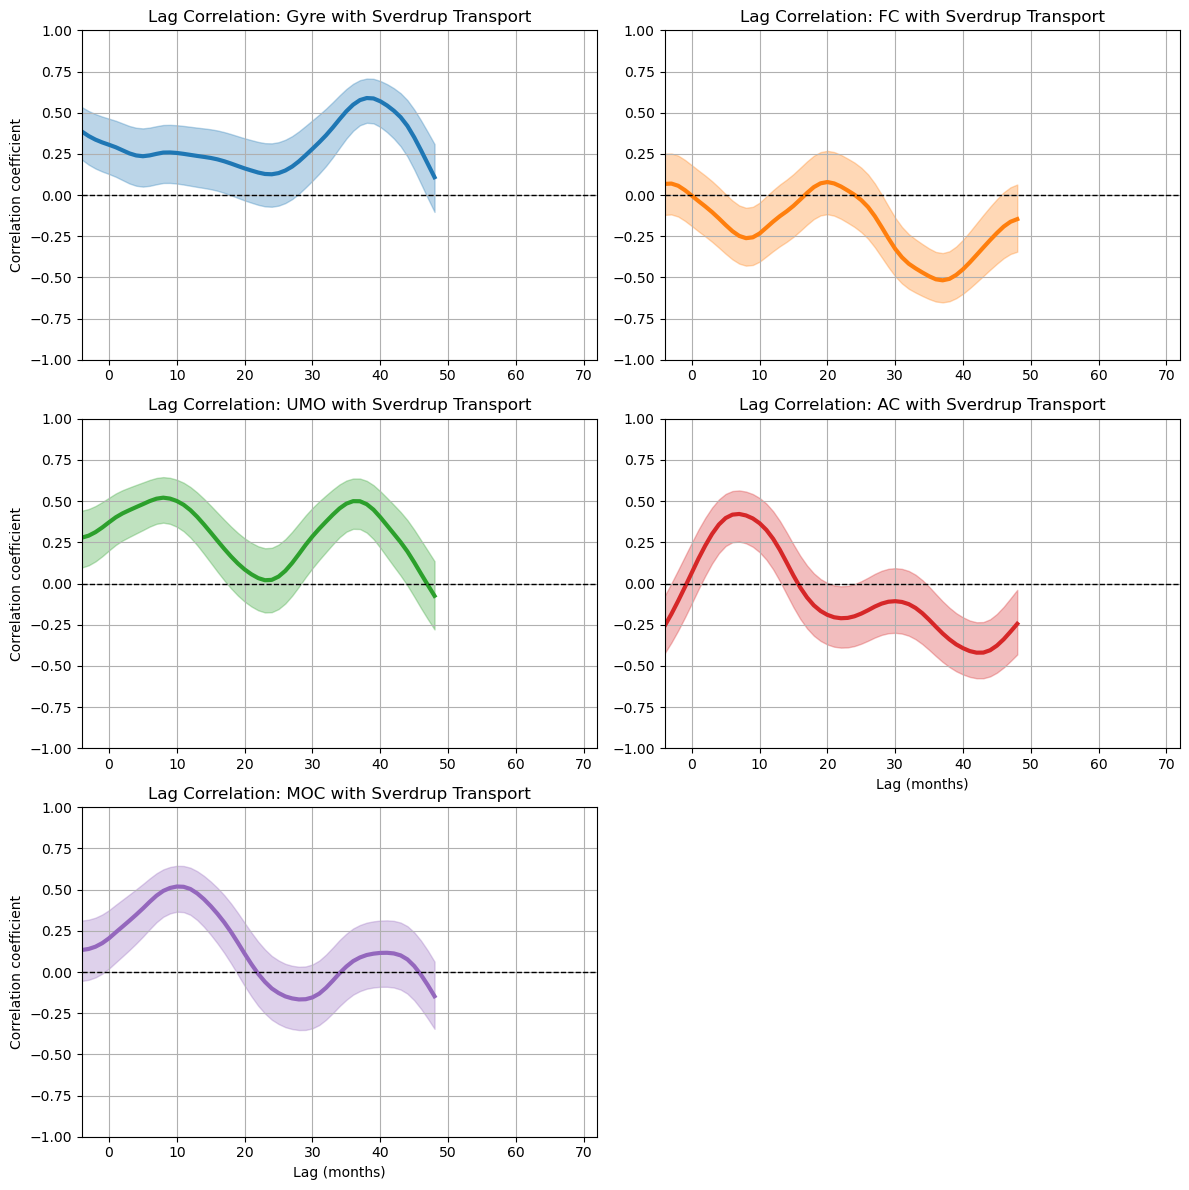

In [51]:
# Function to plot five correlations with filled confidence intervals as subplots in two columns
def plot_five_correlations_cut_axis(lags, correlations, lower_bounds, upper_bounds):
    fig, axs = plt.subplots(3, 2, figsize=(12, 12), sharey=False)#sharex=True,
    axs = axs.flatten()
    colors = ['C0', 'C1', 'C2', 'C3', 'C4']
    transports = ['Gyre', 'FC', 'UMO', 'AC', 'MOC']
    for i in range(5):
        # Plot the correlation and confidence intervals in each subplot
        axs[i].plot(lags, correlations[i], label=transports[i], color=colors[i], linewidth=3)
        axs[i].fill_between(lags, lower_bounds[i], upper_bounds[i], alpha=0.3, color=colors[i])  # Confidence intervals
        axs[i].axhline(0, color='black', lw=1, ls='--')  # Horizontal line at y=0
        axs[i].set_title(f'Lag Correlation: {transports[i]} with Sverdrup Transport')
        axs[i].set_ylim(-1, 1)
        axs[i].grid()
        axs[i].set_xlim([-4, 12*6])
        if i == 0 or i == 2 or i == 4:
            axs[i].set_ylabel('Correlation coefficient')

        if i == 4 or i== 3: 
            axs[i].set_xlabel('Lag (months)')

    fig.delaxes(axs[5])
    plt.tight_layout()
    plt.show()

plot_five_correlations_cut_axis(lags,[correlations_sv_gyre, correlations_sv_fc, correlations_sv_umo, correlations_sv_ac, correlations_sv_moc],
    [lower_bound_gyre_sv, lower_bound_fc_sv, lower_bound_umo_sv, lower_bound_ac_sv, lower_bound_moc_sv],
    [upper_bound_gyre_sv, upper_bound_fc_sv, upper_bound_umo_sv, upper_bound_ac_sv, upper_bound_moc_sv])


#for lag, corr, upper in zip(lags, correlations_sv_umo, lower_bound_umo_sv):
 #   print(f"{lag:<15}{corr:<15.3f}{upper:<15.3f}")

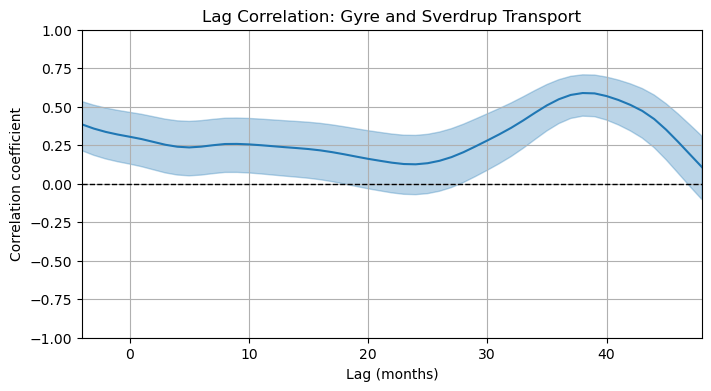

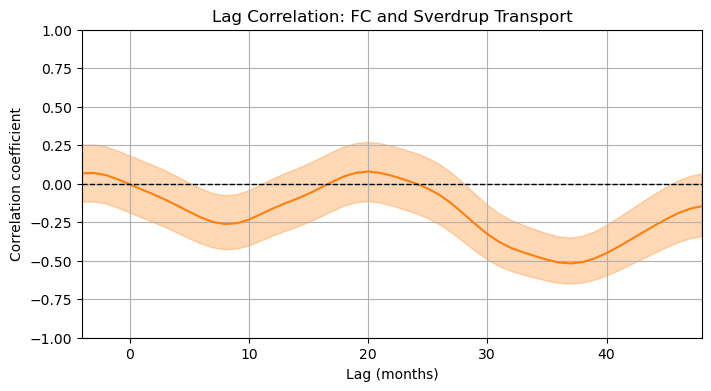

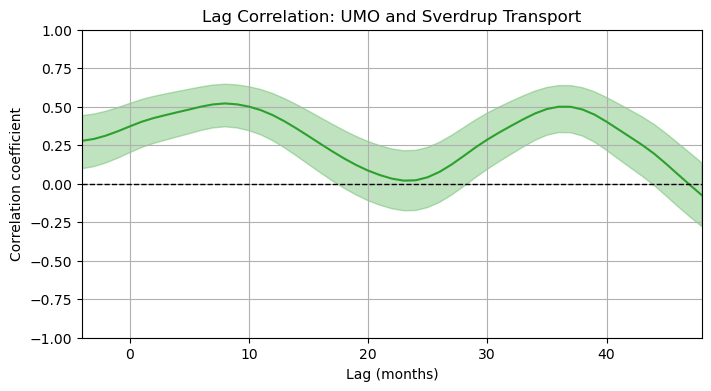

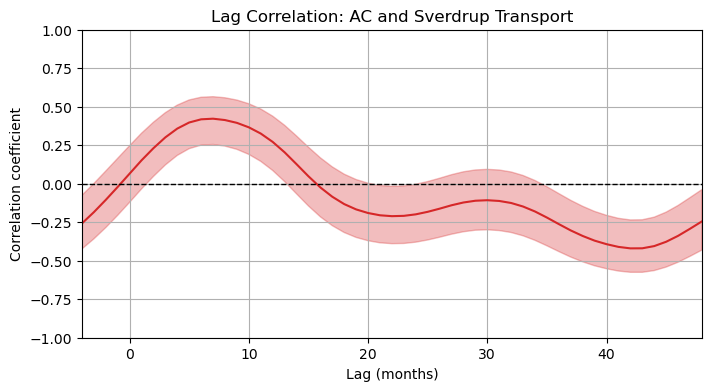

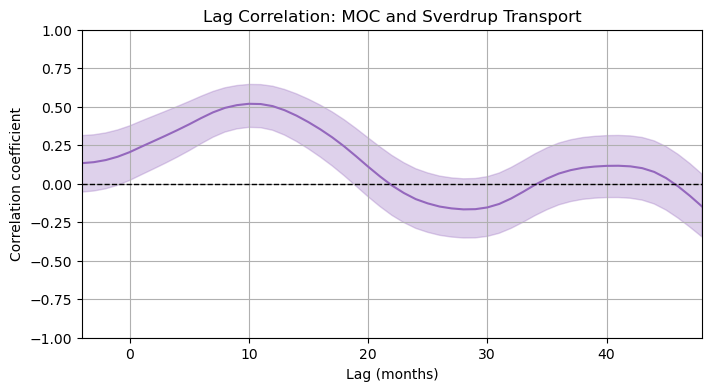

In [52]:
def plot_individual_correlations(lags, correlations, lower_bounds, upper_bounds):
    transports = ['Gyre', 'FC', 'UMO', 'AC', 'MOC']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4'] 
    for i in range(5):
        plt.figure(figsize=(8, 4))
        plt.plot(lags, correlations[i], label=transports[i], color=colors[i])
        plt.fill_between(lags, lower_bounds[i], upper_bounds[i], alpha=0.3, color=colors[i])  # Confidence intervals
        plt.axhline(0, color='black', lw=1, ls='--')  # Horizontal line at 0
        plt.xlabel('Lag (months)')
        plt.ylabel('Correlation coefficient')
        plt.ylim(-1, 1)
        plt.xlim(-4,48)
        plt.title(f'Lag Correlation: {transports[i]} and Sverdrup Transport')
        plt.grid(True)
        plt.show()

plot_individual_correlations(lags, 
    [correlations_sv_gyre, correlations_sv_fc, correlations_sv_umo, correlations_sv_ac, correlations_sv_moc],
    [lower_bound_gyre_sv, lower_bound_fc_sv, lower_bound_umo_sv, lower_bound_ac_sv, lower_bound_moc_sv],
    [upper_bound_gyre_sv, upper_bound_fc_sv, upper_bound_umo_sv, upper_bound_ac_sv, upper_bound_moc_sv])


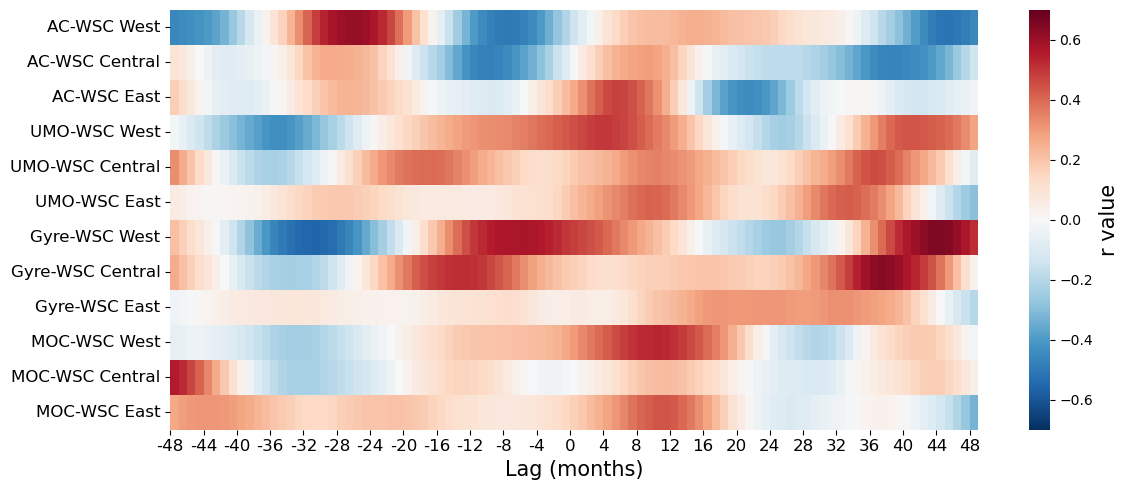

In [53]:
# Correlation matrix
correlation_matrix = np.array([
    correlations_west_ac, correlations_central_ac, correlations_east_ac,
    correlations_west_umo, correlations_central_umo, correlations_east_umo,
    correlations_west_gyre, correlations_central_gyre, correlations_east_gyre,
    correlations_west_moc, correlations_central_moc, correlations_east_moc
])
variables = ['AC-WSC West', 'AC-WSC Central', 'AC-WSC East', 
             'UMO-WSC West', 'UMO-WSC Central', 'UMO-WSC East', 
             'Gyre-WSC West', 'Gyre-WSC Central', 'Gyre-WSC East', 
             'MOC-WSC West', 'MOC-WSC Central', 'MOC-WSC East']
# List of lag labels from -48 to +48 months with ticks every 4 months
lag_labels = np.arange(-48, 49, 4)
# Heatmap using seaborn
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r',yticklabels=variables, xticklabels=False, vmin=-0.7, vmax=0.7)
plt.xlabel('Lag (months)', fontsize=15)
num_lags = len(lag_labels)
plt.xticks(ticks=np.linspace(0,correlation_matrix.shape[1]-1,num=num_lags).astype(int),labels=lag_labels,rotation=0,fontsize=12)
plt.yticks(fontsize=12)

# Colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('r value', fontsize=15)

plt.tight_layout()  
plt.show()

In [54]:
#Correlaciones positivas y negativas
## Gyre
# Find the lag with maximum correlation for each region
best_lag_west_gyre = lags[np.argmax(correlations_west_gyre)]
best_lag_central_gyre = lags[np.argmax(correlations_central_gyre)]
best_lag_east_gyre = lags[np.argmax(correlations_east_gyre)]

# Shift Gyre data according to the best lag for each region
shifted_gyre_west = wsc_west_1y2.shift(time=best_lag_west_gyre)
shifted_gyre_central = wsc_central_1y2.shift(time=best_lag_central_gyre)
shifted_gyre_east = wsc_east_1y2.shift(time=best_lag_east_gyre)


## FC
# Find the lag with maximum correlation for each region
best_lag_west_fc = lags[np.argmax(correlations_west_fc)]
best_lag_central_fc = lags[np.argmax(correlations_central_fc)]
best_lag_east_fc = lags[np.argmax(correlations_east_fc)]

# Shift fc data according to the best lag for each region
shifted_fc_west = wsc_west_1y2.shift(time=best_lag_west_fc)
shifted_fc_central = wsc_central_1y2.shift(time=best_lag_central_fc)
shifted_fc_east = wsc_east_1y2.shift(time=best_lag_east_fc)


## Upper Mid Ocean (UMO)
# Find the lag with maximum correlation for each region
best_lag_west_umo = lags[np.argmax(correlations_west_umo)]
best_lag_central_umo = lags[np.argmax(correlations_central_umo)]
best_lag_east_umo = lags[np.argmax(correlations_east_umo)]

# Shift UMO data according to the best lag for each region
shifted_umo_west = wsc_west_1y.shift(time=best_lag_west_umo)
shifted_umo_central = wsc_central_1y.shift(time=best_lag_central_umo)
shifted_umo_east = wsc_east_1y.shift(time=best_lag_east_umo)

## Antilles Current (AC)
# Find the lag with maximum correlation for each region
best_lag_west_ac = lags[np.argmax(correlations_west_ac)]
best_lag_central_ac = lags[np.argmax(correlations_central_ac)]
best_lag_east_ac = lags[np.argmax(correlations_east_ac)]

# Shift AC data according to the best lag for each region
shifted_ac_west = wsc_west_1y2.shift(time=best_lag_west_ac)
shifted_ac_central = wsc_central_1y2.shift(time=best_lag_central_ac)
shifted_ac_east = wsc_east_1y2.shift(time=best_lag_east_ac)

## Meridional Overturning Circulation (MOC)
# Find the lag with maximum correlation for each region
best_lag_west_moc = lags[np.argmax(correlations_west_moc)]
best_lag_central_moc = lags[np.argmax(correlations_central_moc)]
best_lag_east_moc = lags[np.argmax(correlations_east_moc)]

# Shift MOC data according to the best lag for each region
shifted_moc_west = wsc_west_1y.shift(time=best_lag_west_moc)
shifted_moc_central = wsc_central_1y.shift(time=best_lag_central_moc)
shifted_moc_east = wsc_central_1y.shift(time=best_lag_east_moc)

In [55]:
# Convert correlations and lags to NumPy arrays to support advanced indexing
correlations_west_gyre = np.array(correlations_west_gyre)
correlations_central_gyre = np.array(correlations_central_gyre)
correlations_east_gyre = np.array(correlations_east_gyre)

correlations_west_fc = np.array(correlations_west_fc)
correlations_central_fc=np.array(correlations_central_fc)
correlations_east_fc=np.array(correlations_east_fc)

correlations_west_umo = np.array(correlations_west_umo)
correlations_central_umo = np.array(correlations_central_umo)
correlations_east_umo = np.array(correlations_east_umo)

correlations_west_ac = np.array(correlations_west_ac)
correlations_central_ac = np.array(correlations_central_ac)
correlations_east_ac = np.array(correlations_east_ac)

correlations_west_moc = np.array(correlations_west_moc)
correlations_central_moc = np.array(correlations_central_moc)
correlations_east_moc = np.array(correlations_east_moc)

lags = np.array(lags)  # Convert lags to NumPy array

# Find the maximum R value and best lag for positive lags for each gyre
positive_lag_indices = np.array([i for i, lag in enumerate(lags) if 0 <= lag <= max_lag])

max_corr_west_gyre = max(np.abs(correlations_west_gyre))
best_lag_west_gyre = lags[positive_lag_indices[np.argmax(np.abs(correlations_west_gyre[positive_lag_indices]))]]
#print(max_corr_west_gyre)
#print(best_lag_west_gyre)
max_corr_central_gyre = np.max(np.abs(correlations_central_gyre[positive_lag_indices]))
best_lag_central_gyre = lags[positive_lag_indices[np.argmax(np.abs(correlations_central_gyre[positive_lag_indices]))]]

max_corr_east_gyre = max(np.abs(correlations_east_gyre[positive_lag_indices]))
best_lag_east_gyre = lags[positive_lag_indices[np.argmax(np.abs(correlations_east_gyre[positive_lag_indices]))]]

# Shift Gyre data according to the best lag for each region
#shifted_gyre_west = gyre_1y.shift(time=best_lag_west_gyre)
#shifted_gyre_central = gyre_1y.shift(time=best_lag_central_gyre)
#shifted_gyre_east = gyre_1y.shift(time=best_lag_east_gyre)


#Find the maximum R value and best lag for positive lags for each fc
max_corr_west_fc = max(np.abs(correlations_west_fc))
best_lag_west_fc = lags[positive_lag_indices[np.argmax(np.abs(correlations_west_fc[positive_lag_indices]))]]
max_corr_central_fc = np.max(np.abs(correlations_central_fc[positive_lag_indices]))
best_lag_central_fc = lags[positive_lag_indices[np.argmax(np.abs(correlations_central_fc[positive_lag_indices]))]]
max_corr_east_fc = max(np.abs(correlations_east_fc[positive_lag_indices]))
best_lag_east_fc = lags[positive_lag_indices[np.argmax(np.abs(correlations_east_fc[positive_lag_indices]))]]
# Shift 
shifted_fc_west = wsc_central_1y.shift(time=best_lag_west_fc)
shifted_fc_central = wsc_central_1y.shift(time=best_lag_central_fc)
shifted_fc_east = wsc_central_1y.shift(time=best_lag_east_fc)

# Find the maximum R value and best lag for positive lags for each UMO
max_corr_west_umo = max(np.abs(correlations_west_umo))
best_lag_west_umo = lags[positive_lag_indices[np.argmax(np.abs(correlations_west_umo[positive_lag_indices]))]]

max_corr_central_umo = max(np.abs(correlations_central_umo))
best_lag_central_umo = lags[positive_lag_indices[np.argmax(np.abs(correlations_central_umo[positive_lag_indices]))]]

max_corr_east_umo = max(np.abs(correlations_east_umo))
best_lag_east_umo = lags[positive_lag_indices[np.argmax(np.abs(correlations_east_umo[positive_lag_indices]))]]

# Shift UMO data according to the best lag for each region
shifted_umo_west = -wsc_west_1y.shift(time=best_lag_west_umo)
shifted_umo_central = -wsc_central_1y.shift(time=best_lag_central_umo)
shifted_umo_east = -wsc_east_1y.shift(time=best_lag_east_umo)

# Find the maximum R value and best lag for positive lags for each AC
max_corr_west_ac = max(correlations_west_ac[positive_lag_indices])
best_lag_west_ac = lags[positive_lag_indices[np.argmax(correlations_west_ac[positive_lag_indices])]]

max_corr_central_ac = max(correlations_central_ac[positive_lag_indices])
best_lag_central_ac = lags[positive_lag_indices[np.argmax(correlations_central_ac[positive_lag_indices])]]

max_corr_east_ac = max(correlations_east_ac[positive_lag_indices])
best_lag_east_ac = lags[positive_lag_indices[np.argmax(correlations_east_ac[positive_lag_indices])]]

# Shift AC data according to the best lag for each region
shifted_ac_west = wsc_west_1y2.shift(time=best_lag_west_ac)
shifted_ac_central = wsc_central_1y2.shift(time=best_lag_central_ac)
shifted_ac_east = wsc_east_1y2.shift(time=best_lag_east_ac)

# Find the maximum R value and best lag for positive lags for each MOC
max_corr_west_moc = max(correlations_west_moc[positive_lag_indices])
best_lag_west_moc = lags[positive_lag_indices[np.argmax(correlations_west_moc[positive_lag_indices])]]

max_corr_central_moc = max(correlations_central_moc[positive_lag_indices])
best_lag_central_moc = lags[positive_lag_indices[np.argmax(correlations_central_moc[positive_lag_indices])]]

max_corr_east_moc = max(correlations_east_moc[positive_lag_indices])
best_lag_east_moc = lags[positive_lag_indices[np.argmax(correlations_east_moc[positive_lag_indices])]]

# Shift MOC data according to the best lag for each region
shifted_moc_west = wsc_west_1y.shift(time=best_lag_west_moc)
shifted_moc_central = wsc_central_1y.shift(time=best_lag_central_moc)
shifted_moc_east = wsc_east_1y.shift(time=best_lag_east_moc)


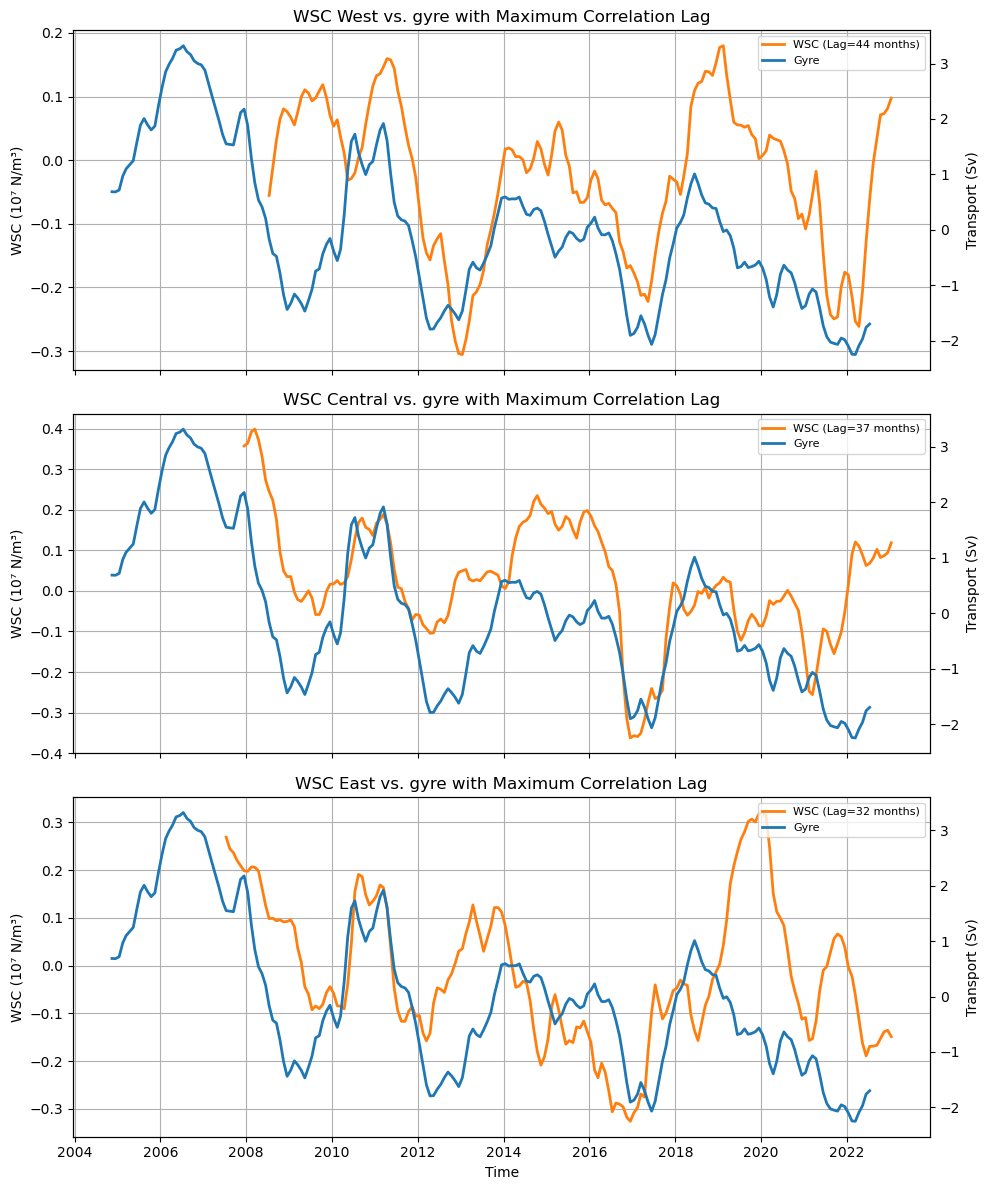

Maximum Lag Correlation (West): 0.6561118697001666 at lag 44
Maximum Lag Correlation (Central): 0.63672257095436 at lag 37
Maximum Lag Correlation (East): 0.32168217778760566 at lag 32
<xarray.DataArray ()>
array(0.65611187)
<xarray.DataArray ()>
array(0.63672257)
<xarray.DataArray ()>
array(0.32168218)


In [56]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Function to create dual y-axis plots
def create_dual_axis_plot(ax, wsc_data, gyre_data, title, best_lag):
    
    # Plot WSC data on the primary y-axis (left side)
    ax.plot(filtered_wsc_time2, wsc_data, color='C1', linewidth=2, label=f'WSC (Lag={best_lag} months)')
    ax.set_ylabel('WSC (10⁷ N/m³)')
    #ax.invert_yaxis()
    # Create secondary y-axis for the umo data (right side)
    ax2 = ax.twinx()
    ax2.plot(filtered_wsc_time2, gyre_data, color='C0', linewidth=2, label='Gyre')
    ax2.set_ylabel('Transport (Sv)')

    ax.set_title(title)
    ax.grid(True)

    # Combine legends from both y-axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

# Create the three subplots
create_dual_axis_plot(axes[0], shifted_gyre_west, gyre_1y-np.mean(gyre_1y),'WSC West vs. gyre with Maximum Correlation Lag', best_lag_west_gyre)
create_dual_axis_plot(axes[1], shifted_gyre_central, gyre_1y-np.mean(gyre_1y),'WSC Central vs. gyre with Maximum Correlation Lag', best_lag_central_gyre)
create_dual_axis_plot(axes[2], shifted_gyre_east, gyre_1y-np.mean(gyre_1y),'WSC East vs. gyre with Maximum Correlation Lag', best_lag_east_gyre)
#wsc_central_1y2
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Print the maximum correlation and the corresponding lag
print(f'Maximum Lag Correlation (West): {max(np.abs(correlations_west_gyre))} at lag {best_lag_west_gyre}')
print(f'Maximum Lag Correlation (Central): {max(np.abs(correlations_central_gyre))} at lag {best_lag_central_gyre}')
print(f'Maximum Lag Correlation (East): {max(np.abs(correlations_east_gyre))} at lag {best_lag_east_gyre}')

corr_1=xr.corr(gyre_1y, shifted_gyre_west)
corr_2=xr.corr(gyre_1y, shifted_gyre_central)
corr_3=xr.corr(gyre_1y, shifted_gyre_east)
print(corr_1)
print(corr_2)
print(corr_3)

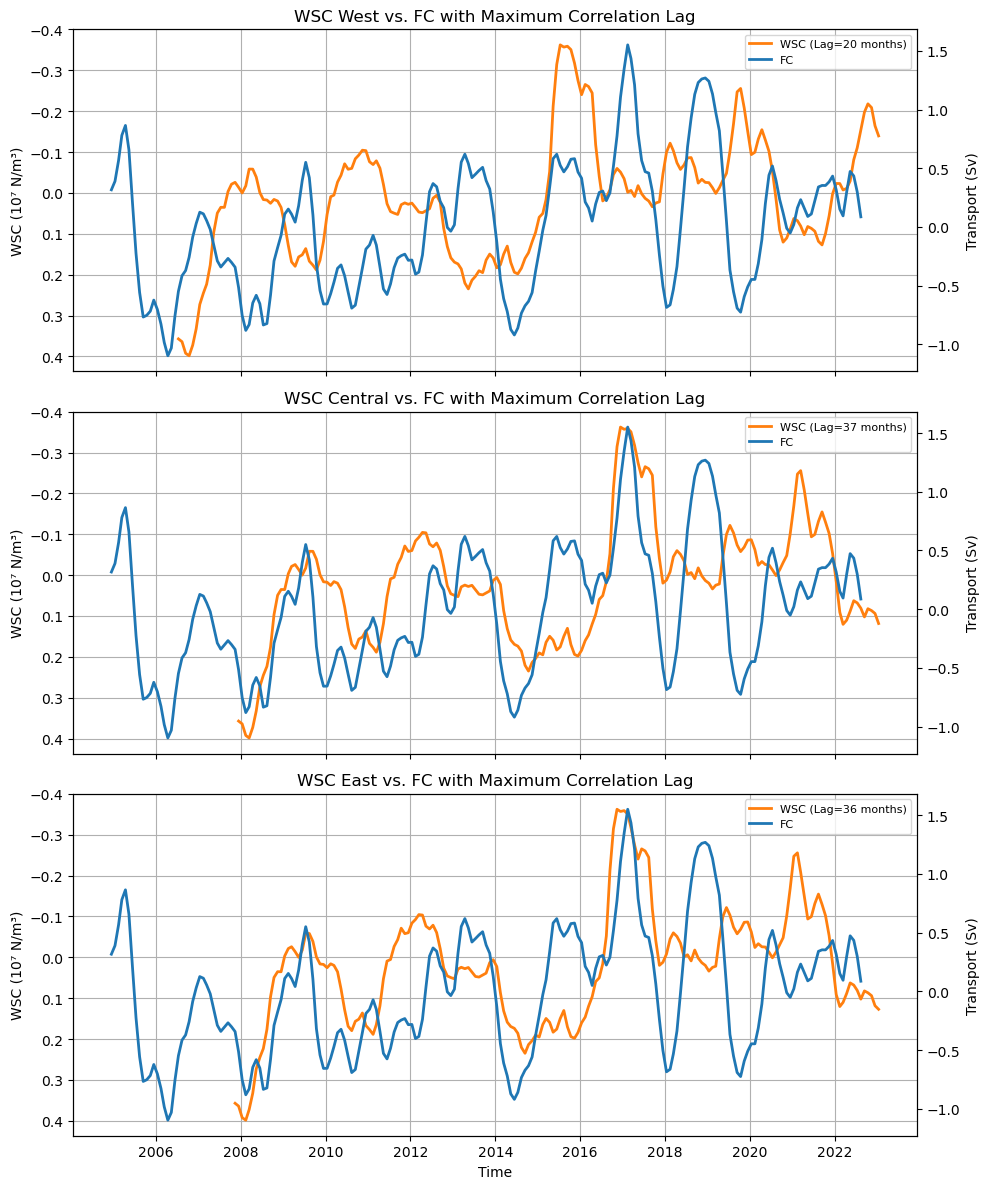

Maximum Lag Correlation (West): 0.2832063956218121 at lag 20
Maximum Lag Correlation (Central): 0.4601278456247123 at lag 37
Maximum Lag Correlation (East): 0.49152996440445806 at lag 36
<xarray.DataArray ()>
array(-0.11729008)
<xarray.DataArray ()>
array(-0.46012785)
<xarray.DataArray ()>
array(-0.45704556)


In [57]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Function to create dual y-axis plots
def create_dual_axis_plot(ax, wsc_data, fc_data, title, best_lag):
    
    # Plot WSC data on the primary y-axis (left side)
    ax.plot(filtered_wsc_time, wsc_data, color='C1', linewidth=2, label=f'WSC (Lag={best_lag} months)')
    ax.set_ylabel('WSC (10⁷ N/m³)')
    ax.invert_yaxis()
    # Create secondary y-axis for the umo data (right side)
    ax2 = ax.twinx()
    ax2.plot(fc_monthly_series_cropped.time, fc_data, color='C0', linewidth=2, label='FC')
    ax2.set_ylabel('Transport (Sv)')

    ax.set_title(title)
    ax.grid(True)

    # Combine legends from both y-axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

# Create the three subplots
create_dual_axis_plot(axes[0], shifted_fc_west, fc_monthly_series_cropped-np.mean(fc_monthly_series_cropped),'WSC West vs. FC with Maximum Correlation Lag', best_lag_west_fc)
create_dual_axis_plot(axes[1], shifted_fc_central, fc_monthly_series_cropped-np.mean(fc_monthly_series_cropped),'WSC Central vs. FC with Maximum Correlation Lag', best_lag_central_fc)
create_dual_axis_plot(axes[2], shifted_fc_east, fc_monthly_series_cropped-np.mean(fc_monthly_series_cropped),'WSC East vs. FC with Maximum Correlation Lag', best_lag_east_fc)
#wsc_central_1y2
axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Print the maximum correlation and the corresponding lag
print(f'Maximum Lag Correlation (West): {max(np.abs(correlations_west_fc))} at lag {best_lag_west_fc}')
print(f'Maximum Lag Correlation (Central): {max(np.abs(correlations_central_fc))} at lag {best_lag_central_fc}')
print(f'Maximum Lag Correlation (East): {max(np.abs(correlations_east_fc))} at lag {best_lag_east_fc}')

corr_1=xr.corr(fc_monthly_series_cropped, shifted_fc_west)
corr_2=xr.corr(fc_monthly_series_cropped, shifted_fc_central)
corr_3=xr.corr(fc_monthly_series_cropped, shifted_fc_east)
print(corr_1)
print(corr_2)
print(corr_3)

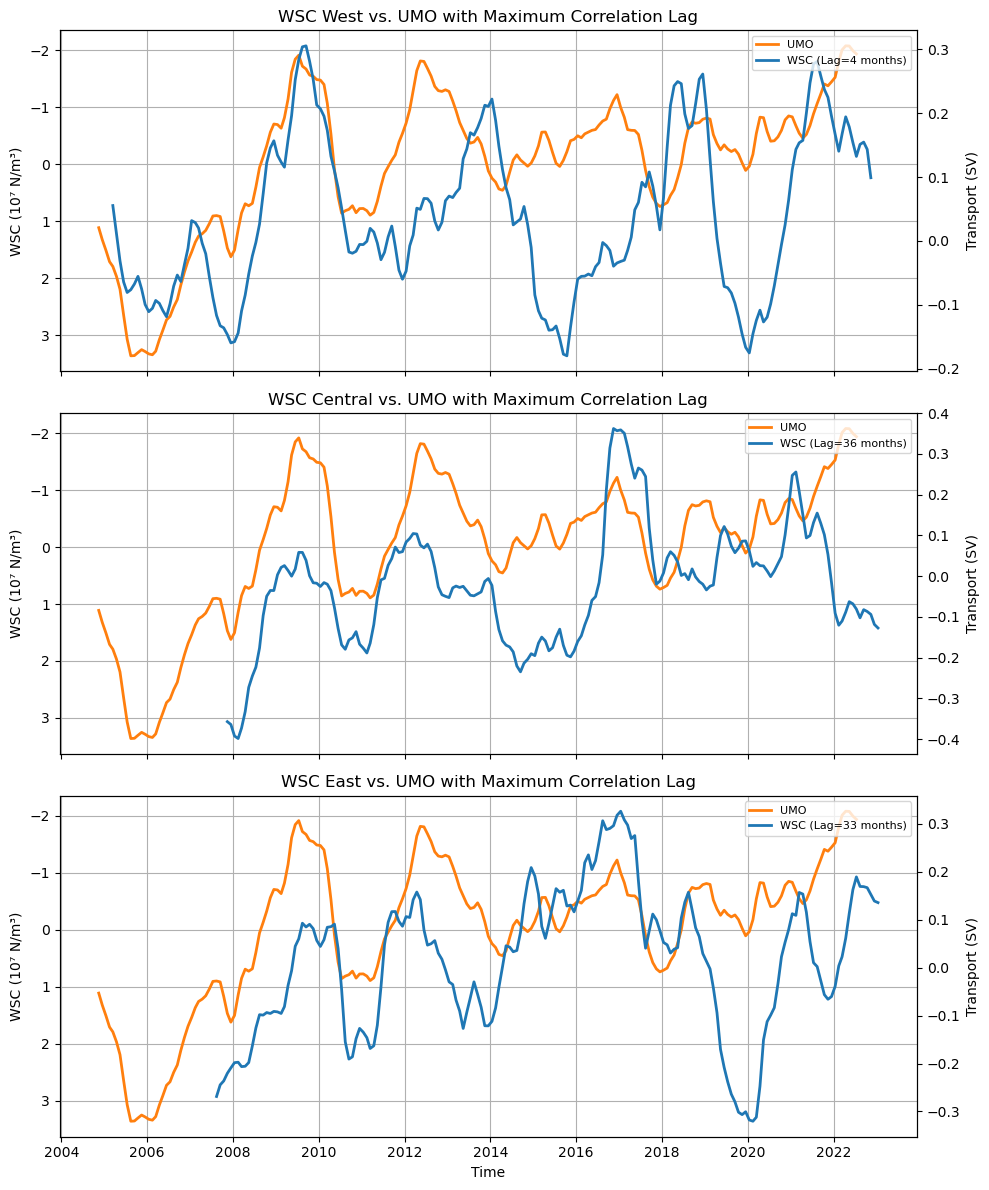

Maximum Lag Correlation (West): 0.4932026048144517 at lag 4
Maximum Lag Correlation (Central): 0.4555095194302083 at lag 36
Maximum Lag Correlation (East): 0.42163029980761757 at lag 33


In [58]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Function to create dual y-axis plots
def create_dual_axis_plot(ax, umo_data, wsc_data, title, best_lag):
    # Plot WSC data on the primary y-axis (left side)
    ax.plot(filtered_wsc_time, umo_data, color='C1', linewidth=2, label='UMO')
    ax.set_ylabel('WSC (10⁷ N/m³)')
    ax.invert_yaxis()
    # Create secondary y-axis for the umo data (right side)
    ax2 = ax.twinx()
    ax2.plot(filtered_wsc_time, wsc_data, color='C0', linewidth=2, label=f'WSC (Lag={best_lag} months)')
    ax2.set_ylabel('Transport (SV)')

    ax.set_title(title)
    ax.grid(True)

    # Combine legends from both y-axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

# Create the three subplots
create_dual_axis_plot(axes[0], umo_1y-np.mean(umo_1y), shifted_umo_west, 'WSC West vs. UMO with Maximum Correlation Lag', best_lag_west_umo)
create_dual_axis_plot(axes[1], umo_1y-np.mean(umo_1y), shifted_umo_central, 'WSC Central vs. UMO with Maximum Correlation Lag', best_lag_central_umo)
create_dual_axis_plot(axes[2], umo_1y-np.mean(umo_1y), shifted_umo_east, 'WSC East vs. UMO with Maximum Correlation Lag', best_lag_east_umo)

axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Print the maximum correlation and the corresponding lag
print(f'Maximum Lag Correlation (West): {max(np.abs(correlations_west_umo))} at lag {best_lag_west_umo}')
print(f'Maximum Lag Correlation (Central): {max(np.abs(correlations_central_umo))} at lag {best_lag_central_umo}')
print(f'Maximum Lag Correlation (East): {max(np.abs(correlations_east_umo))} at lag {best_lag_east_umo}')

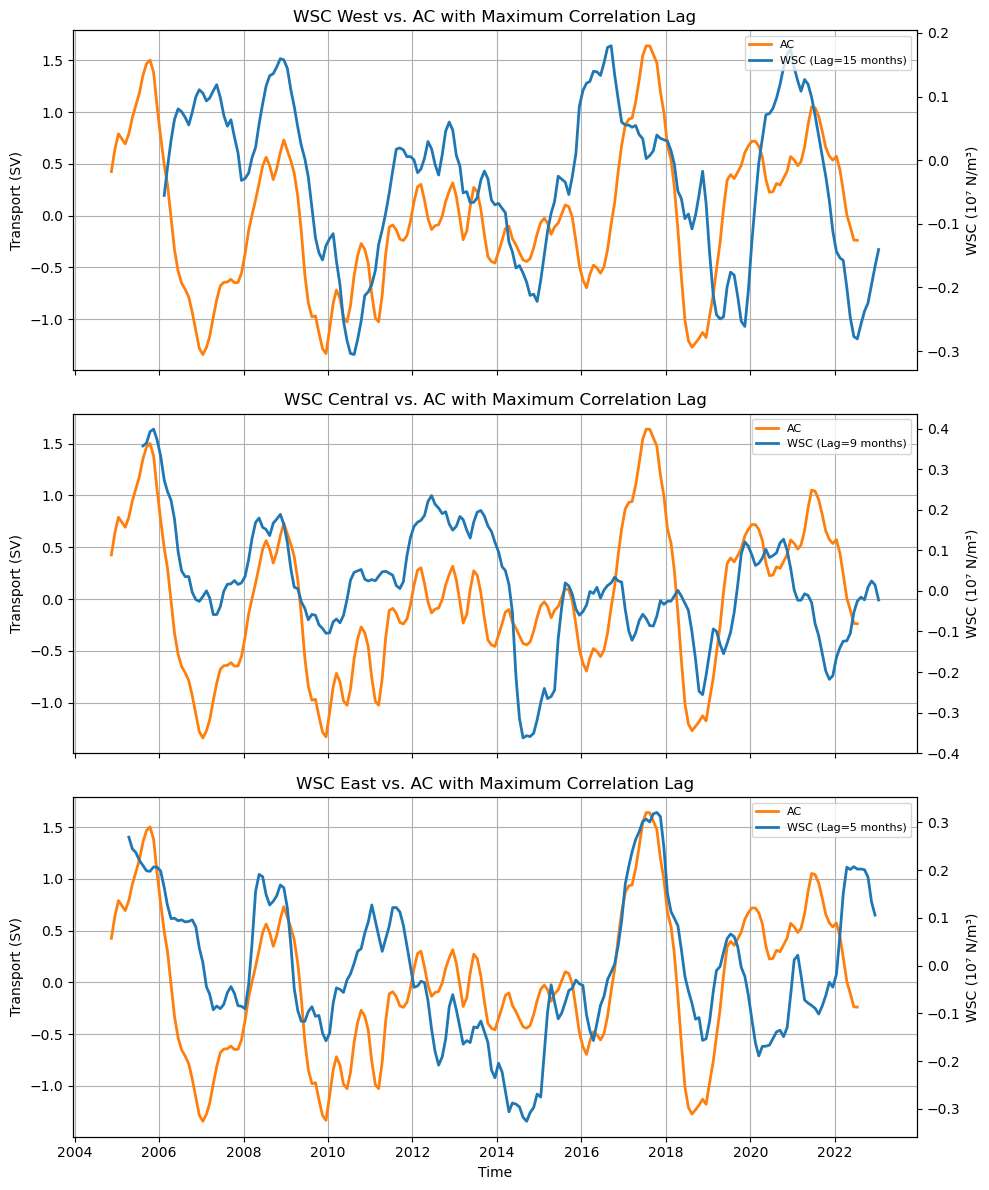

Maximum Lag Correlation (West): 0.6099986829342245 at lag 15
Maximum Lag Correlation (Central): 0.2900682541666591 at lag 9
Maximum Lag Correlation (East): 0.4768485761678625 at lag 5


In [61]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Function to create dual y-axis plots
def create_dual_axis_plot(ax, ac_data, wsc_data, title, best_lag):
    # Plot WSC data on the primary y-axis (left side)
    ax.plot(filtered_wsc_time2, ac_data, color='C1', linewidth=2, label='AC')
    ax.set_ylabel('Transport (SV)')
    #ax.invert_yaxis()
    # Create secondary y-axis for the umo data (right side)
    ax2 = ax.twinx()
    ax2.plot(filtered_wsc_time2, wsc_data, color='C0', linewidth=2, label=f'WSC (Lag={best_lag} months)')
    ax2.set_ylabel('WSC (10⁷ N/m³)')

    ax.set_title(title)
    ax.grid(True)

    # Combine legends from both y-axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

# Create the three subplots
create_dual_axis_plot(axes[0], ac_1y-np.mean(ac_1y), shifted_ac_west, 'WSC West vs. AC with Maximum Correlation Lag', best_lag_west_ac)
create_dual_axis_plot(axes[1], ac_1y-np.mean(ac_1y), shifted_ac_central, 'WSC Central vs. AC with Maximum Correlation Lag', best_lag_central_ac)
create_dual_axis_plot(axes[2], ac_1y-np.mean(ac_1y), shifted_ac_east, 'WSC East vs. AC with Maximum Correlation Lag', best_lag_east_ac)

axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Print the maximum correlation and the corresponding lag
print(f'Maximum Lag Correlation (West): {max(correlations_west_ac)} at lag {best_lag_west_ac}')
print(f'Maximum Lag Correlation (Central): {max(correlations_central_ac)} at lag {best_lag_central_ac}')
print(f'Maximum Lag Correlation (East): {max(correlations_east_ac)} at lag {best_lag_east_ac}')

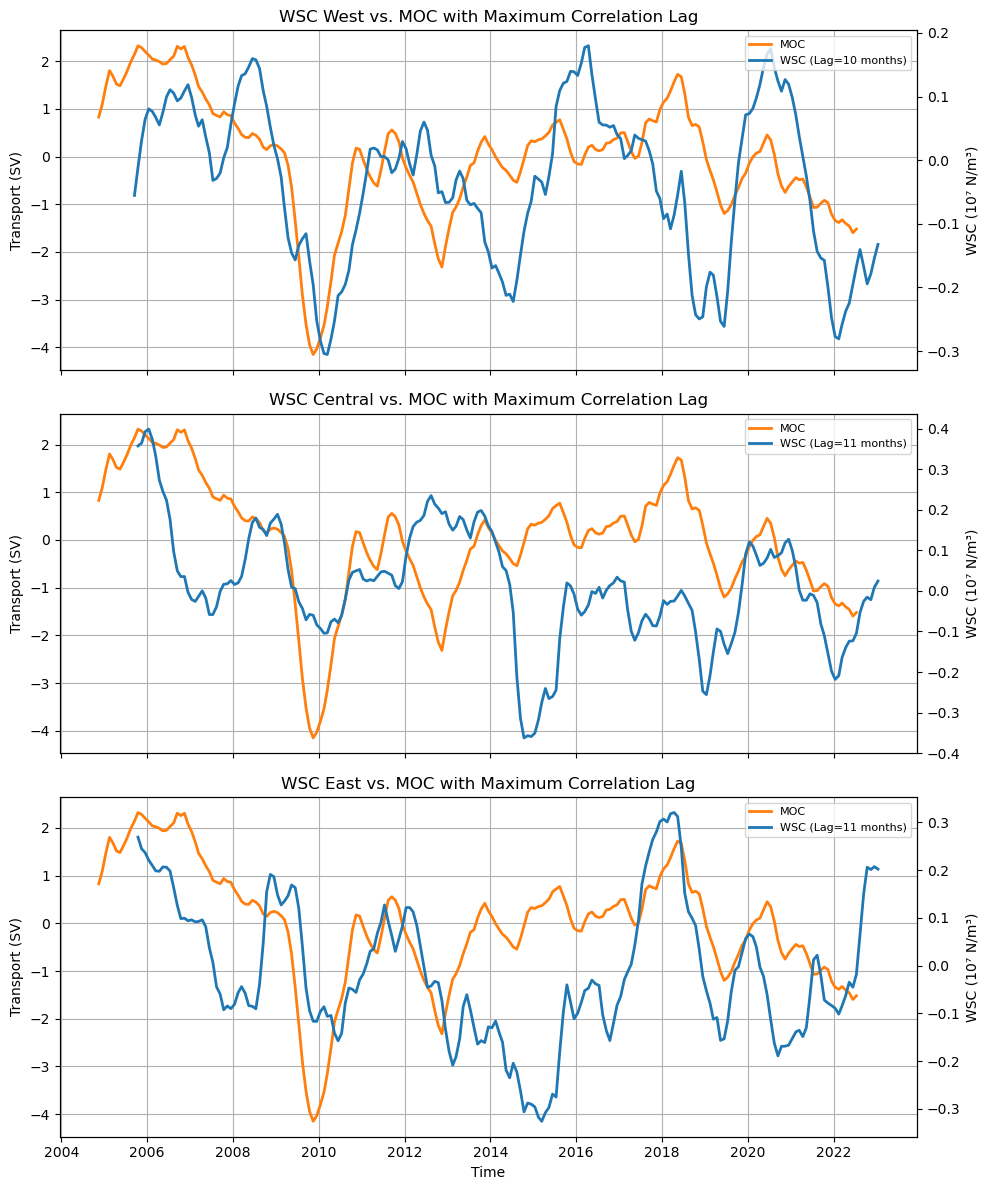

Maximum Lag Correlation (West): 0.5321422875264286 at lag 10
Maximum Lag Correlation (Central): 0.5545165326464973 at lag 11
Maximum Lag Correlation (East): 0.43868382950177265 at lag 11


In [62]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Function to create dual y-axis plots
def create_dual_axis_plot(ax, moc_data, wsc_data, title, best_lag):
    # Plot WSC data on the primary y-axis (left side)
    ax.plot(filtered_wsc_time, moc_data, color='C1', linewidth=2, label='MOC')
    ax.set_ylabel('Transport (SV)')
    #ax.invert_yaxis()
    # Create secondary y-axis for the umo data (right side)
    ax2 = ax.twinx()
    ax2.plot(filtered_wsc_time, wsc_data, color='C0', linewidth=2, label=f'WSC (Lag={best_lag} months)')
    ax2.set_ylabel('WSC (10⁷ N/m³)')

    ax.set_title(title)
    ax.grid(True)

    # Combine legends from both y-axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=8)

# Create the three subplots
create_dual_axis_plot(axes[0], moc_1y-np.mean(moc_1y), shifted_moc_west, 'WSC West vs. MOC with Maximum Correlation Lag', best_lag_west_moc)
create_dual_axis_plot(axes[1], moc_1y-np.mean(moc_1y), shifted_moc_central, 'WSC Central vs. MOC with Maximum Correlation Lag', best_lag_central_moc)
create_dual_axis_plot(axes[2], moc_1y-np.mean(moc_1y), shifted_moc_east, 'WSC East vs. MOC with Maximum Correlation Lag', best_lag_east_moc)

axes[2].set_xlabel('Time')
plt.tight_layout()
plt.show()

# Print the maximum correlation and the corresponding lag
print(f'Maximum Lag Correlation (West): {max(np.abs(correlations_west_moc))} at lag {best_lag_west_moc}')
print(f'Maximum Lag Correlation (Central): {max(np.abs(correlations_central_moc))} at lag {best_lag_central_moc}')
print(f'Maximum Lag Correlation (East): {max(np.abs(correlations_east_moc))} at lag {best_lag_east_moc}')